# Problem Statement - Machine Learning 1 Project - Coded

### Business Context

### Objective

### Data Description

Data Dictionary:

* Booking_ID: the unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
  * Not Selected – No meal plan selected
  * Meal Plan 1 – Breakfast
  * Meal Plan 2 – Half board (breakfast and one other meal)
  * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

### Problem definition

* INN Hotels Group is experiencing a high number of booking cancellations across its chain of hotels in Portugal, negatively impacting revenue and operational efficiency.
* They need a data-driven solution to predict which bookings are likely to be canceled in advance.
* Analyze the historical booking data to identify key factors that influence cancellations.
* Develop a Machine Learning model to predict the likelihood of a booking being canceled.

## Importing the necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
# %load_ext nb_black

import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# Library for scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

## Loading the dataset

In [2]:
df_main = pd.read_csv("INNHotelsGroup.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

## Overview of the dataset

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [5]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

### Understand the shape of the dataset.

In [6]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns.

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The dataset consists of 36,275 rows and 19 columns.
* The dataset contains a mix of numerical (int64, float64) and categorical (object) features.
* Numerical variables include fields like no_of_adults, no_of_weekend_nights, and lead_time.
* Categorical variables include features like Booking_ID, type_of_meal_plan, and room_type_reserved.
* There are no missing values in any of the columns, which simplifies data preparation and cleaning.

### Checking for missing values

In [8]:
# checking for null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no null values in the dataset

### Dropping the duplicate values

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate values in the data.

#### Dropping the columns with all unique values

In [10]:
data.Booking_ID.nunique()

36275

* The `Booking_ID` column contains only unique values, so we can drop it

In [11]:
data = data.drop(["Booking_ID"], axis=1)

In [12]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

### Statistical summary of the data

**Let's check the statistical summary of the data.**

In [13]:
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

* There are 36,275 bookings in total
* The average number of adults per booking is around 1.84, which suggests most bookings are for 2 adults (as reflected in the median and mode).
* The average number of children per booking is low, at 0.105, indicating that the majority of bookings are for adults without children. There are a few instances where up to 10 children were part of a booking (the maximum value).
* Weekend nights: On average, bookings include 0.81 weekend nights, with most bookings either including no weekend nights or just one weekend night.
* Weekday nights: The average number of weeknights is 2.2, with a maximum of 17 weeknights for certain bookings. The mode and median are around 2 or 3 nights, indicating that most bookings last for 1-3 weekdays.
* The average lead time for bookings is 85.23 days, meaning most guests book around three months in advance. However, the lead time ranges from 0 to 443 days (more than a year), which highlights a wide variation in booking behavior.
* The arrival year is centered around 2017-2018 (the dataset contains bookings primarily from these years).
* The arrival months range from 1 to 12, with an average of July (7), indicating a tendency for bookings in mid-year. The months of May, August, October, and December seem significant based on the 25th, 50th, and 75th percentiles.
* The arrival date (within a month) has an average of the 15th day of the month, with the dates spread across the entire month (ranging from 1 to 31).
* Room Type Reserved: There are 7 distinct room types available, with Room_Type 1 being the most common (appears 28,130 times).
* Meal Plan: There are 4 distinct meal plans, and Meal Plan 1 is by far the most popular, as it appears in 27,835 bookings.
* Special Requests: On average, each booking has 0.62 special requests, but a large number of bookings have no special requests. The highest number of special requests for a single booking is 5.
* Very few customers require car parking, with only about 3% of the bookings needing a parking space (0.03099 mean for required_car_parking_space).
* There are 5 market segments, with "Online" bookings dominating, as this segment accounts for 23,214 bookings.
* Repeated Guests: Only about 2.56% of guests are repeat customers, indicating that the majority are first-time visitors.
* The average number of previous cancellations is quite low, at 0.02 per booking, but there are a few guests who have canceled up to 13 times.
* Non-canceled bookings: Most guests haven't canceled previously, with the median and mode both being 0, but some customers have as many as 58 prior bookings that were not canceled.
* The average price per room is $103.42, with a significant spread (standard deviation of 35.09). Prices range from 0 to 540, though most prices are concentrated between 80.30 and 120.
* Out of 36,275 bookings, 24,390 are marked as "Not Canceled", which indicates a cancellation rate of around 33%, implying that one-third of bookings in the dataset have been canceled.

## Exploratory Data Analysis (EDA) 

**The below functions need to be defined to carry out the EDA.**

### Univariate Analysis

In [14]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="pink"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color="purple"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="black", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="yellow", linestyle="-"
    )  # Add median to the histogram
     

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="twilight",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
     

In [16]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

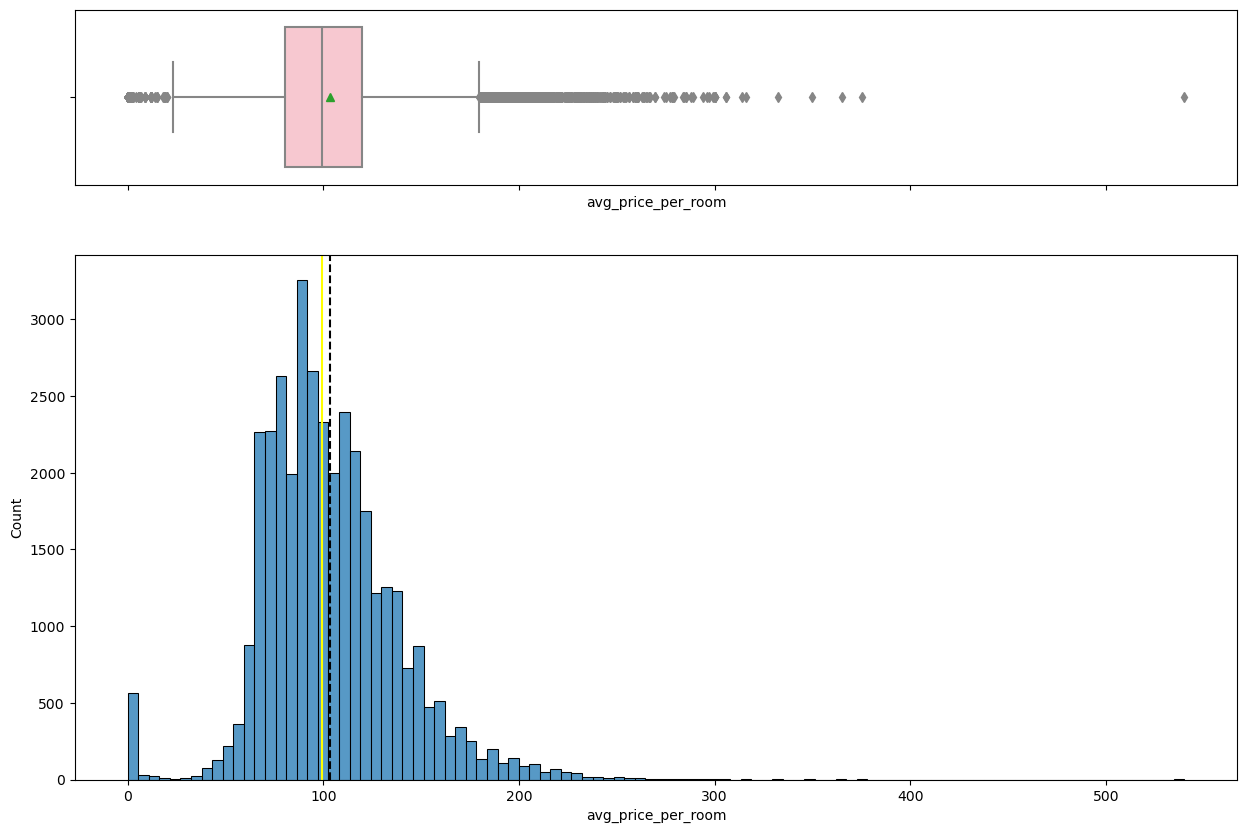

In [17]:
histogram_boxplot(data, "avg_price_per_room",bins=100)

1. Boxplot (Top Plot):
* Outliers: There are several outliers on both ends, especially on the higher end (room prices above 200). These extreme values could indicate either luxury or premium bookings.
* Median: The green triangle shows the median value of avg_price_per_room, which is located near the center of the interquartile range (IQR), indicating that most room prices are clustered around this value.
* Skewness: The long tail on the right side suggests that the distribution is positively skewed, meaning there are some very high room prices that drive the average up.
2. Histogram (Bottom Plot):
* Distribution Shape: The histogram shows that the distribution is unimodal and right-skewed, with most room prices concentrated between 50 and 150. A significant number of bookings fall in this range.
* Mean vs. Median: The mean (yellow line) is slightly higher than the median (black dashed line), further indicating a positive skew in the data. This suggests that while most prices are lower, the higher outliers increase the average room price.
* Price Range: Very few rooms have a price exceeding 200, which could indicate a niche market for high-end rooms or pricing strategies that target specific customer segments.
3. Overall Insights:
* Outliers: The presence of outliers, particularly high-priced rooms, could be important for understanding whether premium or luxury bookings are more prone to cancellation.
* Skewness: The right-skewed distribution could mean that higher-priced rooms may contribute to a different cancellation behavior compared to mid-range bookings.

Majority of Bookings: Since most room prices are within a reasonable range (50-150), this price segment could be where most cancellations or successful bookings occur. Understanding customer behavior in this range might help predict cancellation likelihood.


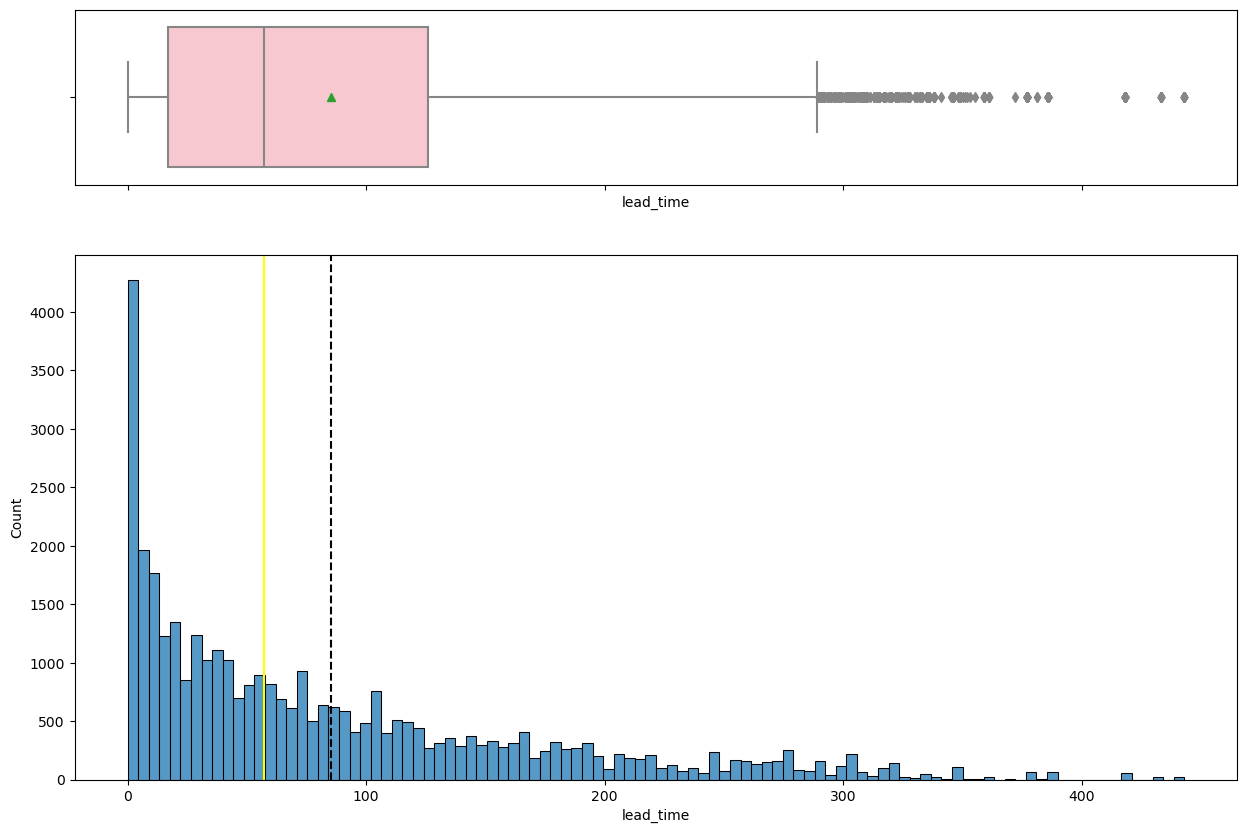

In [18]:
histogram_boxplot(data, "lead_time",bins=100)

1. Boxplot (Top Plot):
* Outliers: There are a significant number of outliers at the high end of the lead time, with values extending beyond 300 days up to 440+ days. These outliers indicate that some bookings are made almost a year in advance.
* Interquartile Range (IQR): The bulk of the data lies within a lead time of approximately 0 to 130 days. The box covers the middle 50% of the data, which shows that most bookings are made between 17 and 126 days in advance (from previous insights).
* Median Lead Time: The median value (black line in the box) is around 57 days, meaning half of the bookings are made within two months of the stay.
2. Histogram (Bottom Plot):
* Distribution Shape: The distribution is right-skewed, meaning that most bookings have a shorter lead time, but there are still a significant number of bookings with longer lead times.
* Mode: The highest frequency (peak) of bookings has a lead time of 0-10 days, showing that many customers book their stays at short notice.
* Mean vs. Median: The mean lead time (yellow line) is greater than the median (black dashed line), indicating that the long tail of higher lead times pulls the mean up. The mean lead time is around 85 days, as mentioned in earlier statistics, but most bookings are made much earlier.
* Long Tail: The lead time distribution extends beyond 300 days, though the frequency of such long lead times is low compared to shorter bookings.
3 Overall Insights:
* Short-Notice Bookings: A large portion of bookings occurs within the first 0-30 days of the stay date, which could suggest a tendency for last-minute planning by customers.
* Long-Term Planners: Some customers plan far in advance, but they represent a minority. The long tail in the histogram shows that while it’s rare, some bookings are made almost a year in advance.
* Cancellations and Lead Time: Given the wide spread in lead times, it's possible that both short-term and long-term bookings may have different cancellation behaviors. Shorter lead times might correlate with spontaneous trips and possibly higher cancellation rates, while longer lead times could suggest more planned and firm bookings.

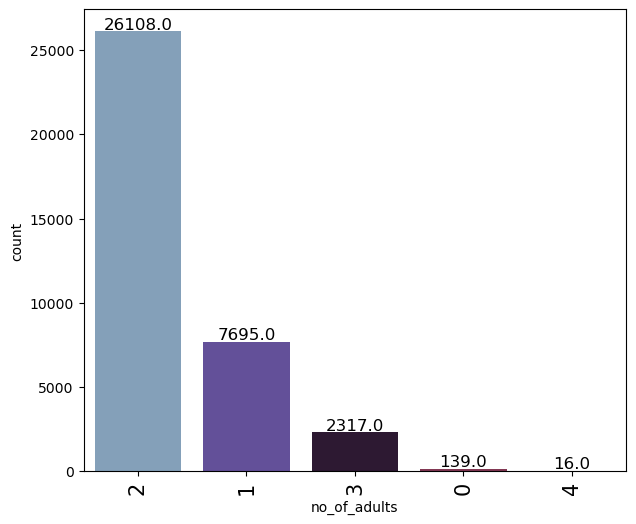

In [19]:
labeled_barplot(data, "no_of_adults")

* he majority of the bookings (26,108) involve two adults. This indicates that the most common booking is made by couples or two individuals traveling together.
* The second-largest group (7,695 bookings) consists of single adult bookings. This suggests a significant number of solo travelers or single occupancy in rooms.
* A smaller number (2,317) of bookings have three adults, likely representing group travel with three individuals or small families with an additional adult.
* There are 139 bookings with zero adults, which could be data entry errors, as it's unlikely to have a booking without at least one adult. These entries may need further investigation or cleaning.
* There are 16 bookings involving four adults. These might represent larger families or groups traveling together.

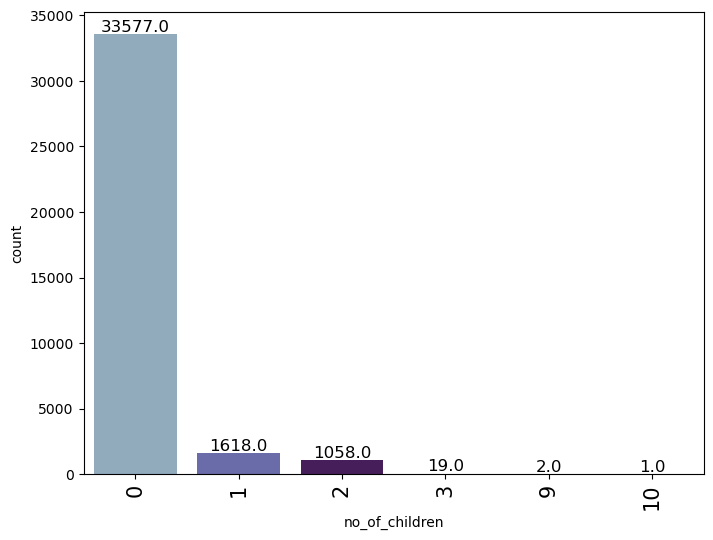

In [20]:
labeled_barplot(data, "no_of_children")

* The majority of the bookings (33,577) involve zero children. This indicates that the most common booking is made by couples or two individuals traveling together.
* There are 1618 bookings with one children.
* There are 1058 bookings with two children which is quite lesser than one children.
* Only 19 bookings with three children.
* Two bookings have 9 children.These might represent larger families or groups traveling together.
* There is 1 booking with 10 children. These might represent larger families or groups traveling together.

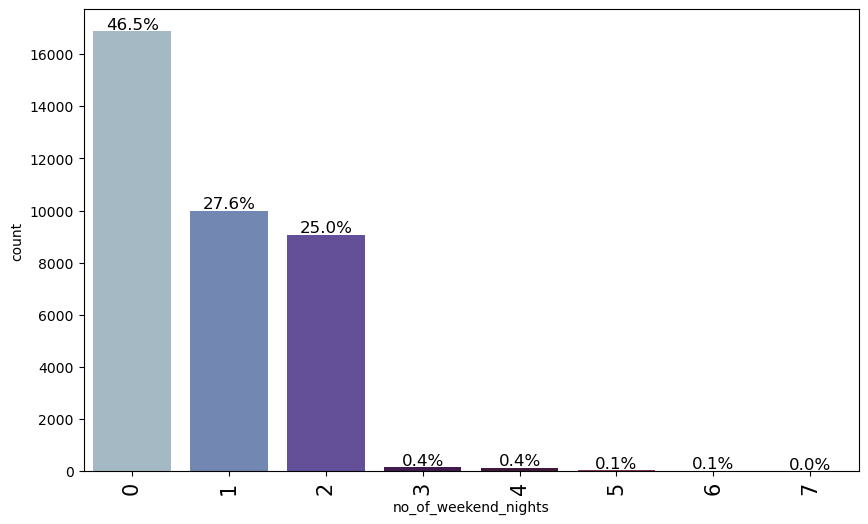

In [21]:
labeled_barplot(data, "no_of_weekend_nights",perc=True)

* 46.5% of the bookings were not made for weekends.
* 27.6% of the bookings were made for 1 weekend.
* 25% of the bookings were made for 2 weekends.
* Only 0.4% of the bookings were made for 3 weekends and 4 weekends.
* Only 0.1% of the bookings were made for 5 weekends.
* This shows that a majority of bookings either avoided weekends altogether or included just one weekend, with very few involving three weekends,four weekends and 5 weekends.

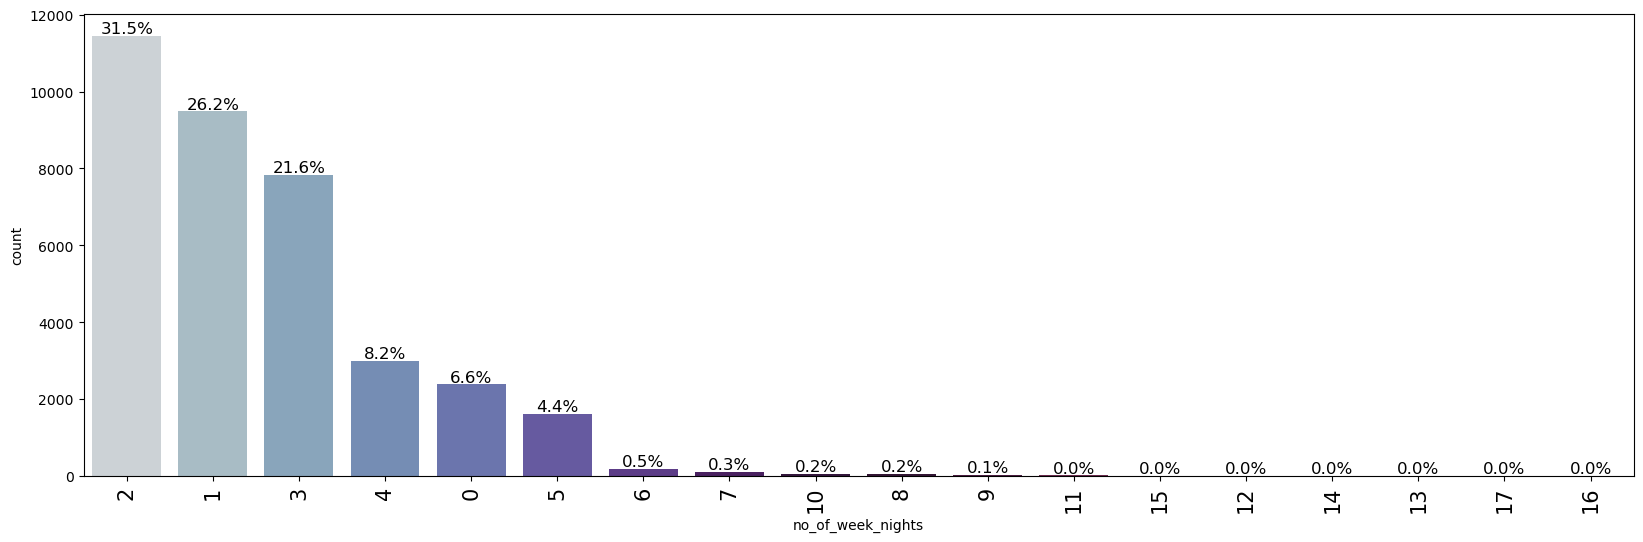

In [22]:
labeled_barplot(data, "no_of_week_nights",perc = True)

* 31.5% of the bookings were made for 2 week nights.
* 26.2% of the bookings were made for 1 week night.
* 21.6% of the bookings were made for 3 week nights.
* 8.2% of the bookings were made for 4 week nights.
* 6.6% of the bookings were not made for any week night.
* 4.4% of the bookings were made for 5 week nights.
* 0.5% of the bookings were made for 6 week nights
* 0.3% of the bookings were made for 7 week nights
* 0.2% of the bookings were made for 8 and 10 week nights
* 0.1 of the bookings were made for 9 week nights

This shows that most bookings were made for up to 3 weeknights, with very few extending beyond 5 weeknights.

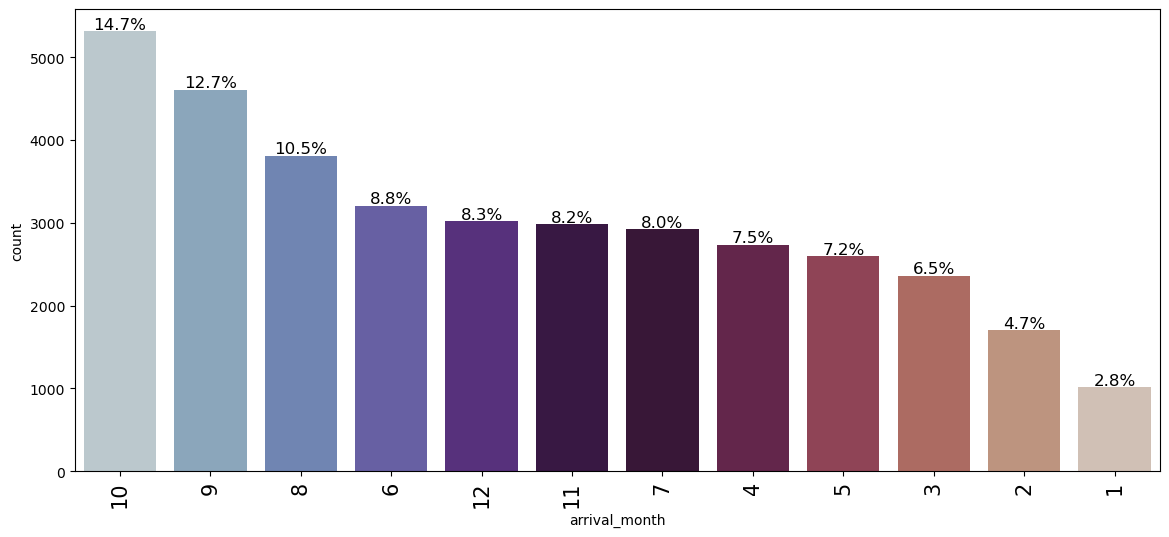

In [23]:
labeled_barplot(data, 'arrival_month', perc=True, n=None)

* 14.7% bookings were made on october.

* 12.7% bookings were made on september.

* 10.5% bookings were made on August.

* 8.8% bookings were made on June.

* 8.3% bookings were made on December.

* 8.2% bookings were made on November.

* 8% bookings were made on July.

* 7.5% bookings were made on April.

* 7.2% bookings were made on May.

* 6.5% bookings were made on March.

* 4.7% bookings were made on February.

* 2.8% bookings were made on January.

This indicates that the highest number of bookings occurred in the months of October, then in September, and August, while the fewest bookings were made in January and February.

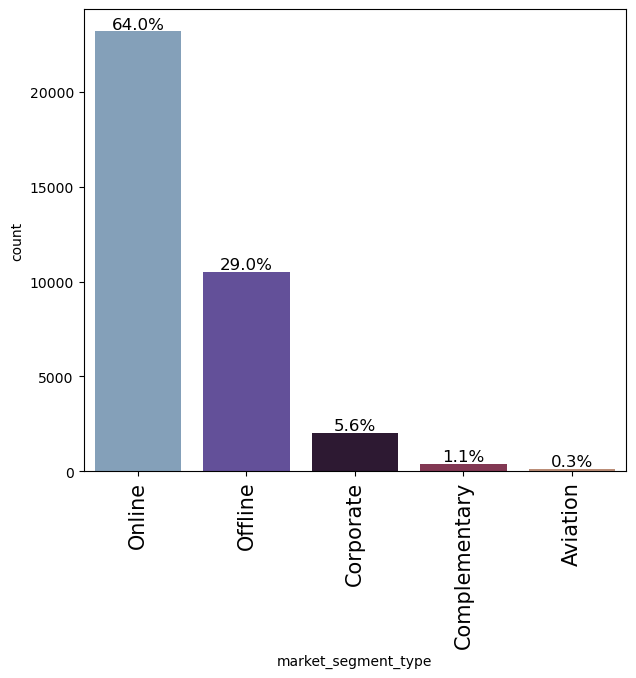

In [24]:
labeled_barplot(data, "market_segment_type",perc = True)

* 64.0% of the bookings were made through the Online market segment.
* 29.0% of the bookings were made through the Offline segment.
* 5.6% of the bookings came from the Corporate segment.
* 1.1% of the bookings were from the Complementary segment.
* Only 0.3% of the bookings were made through the Aviation segment.

    This indicates that the majority of bookings were made online, followed by offline, with significantly fewer bookings from corporate, complementary, and aviation channels.

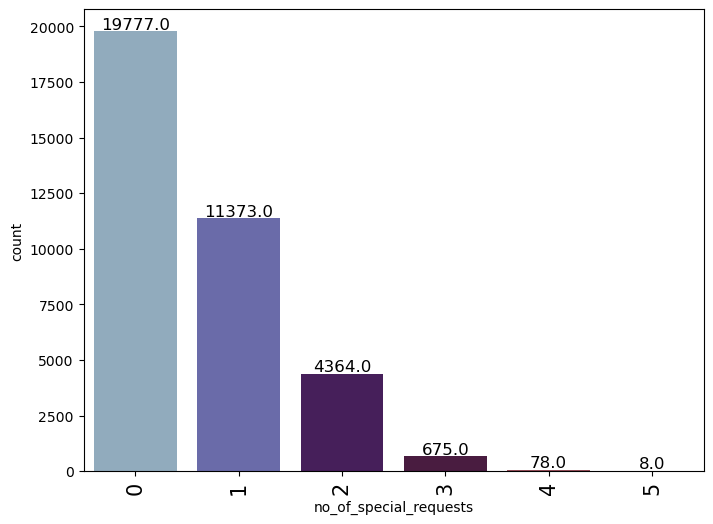

In [25]:
labeled_barplot(data,'no_of_special_requests')

* 19,777 bookings had 0 special requests.
* 11,373 bookings had 1 special request.
* 4,364 bookings had 2 special requests.
* 675 bookings had 3 special requests.
* 78 bookings had 4 special requests.
* 8 bookings had 5 special requests.

    The majority of bookings (almost half) had no special requests, while only a small number involved more than three requests.

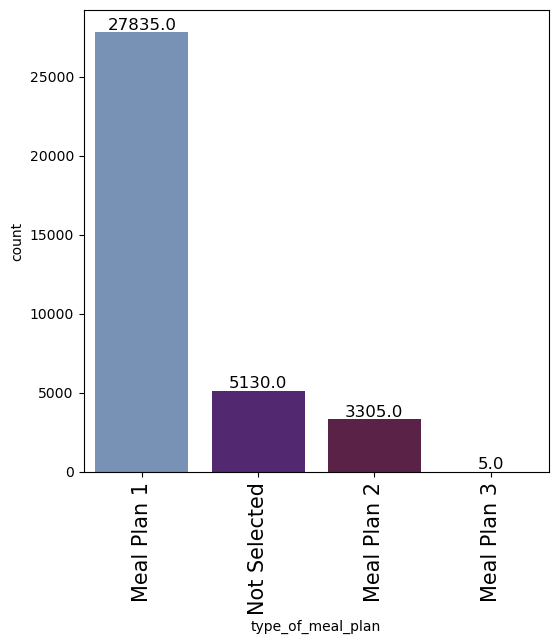

In [26]:
labeled_barplot(data,'type_of_meal_plan')

* Meal Plan 1 was selected for 27,835 bookings.
* 5,130 bookings did not select any meal plan (Not Selected).
* 3,305 bookings were made with Meal Plan 2.
* 5 bookings chose Meal Plan 3.

The vast majority of bookings opted for Meal Plan 1, with significantly fewer bookings either not selecting a meal plan or choosing Meal Plan 2. Meal Plan 3 had an extremely low selection rate.



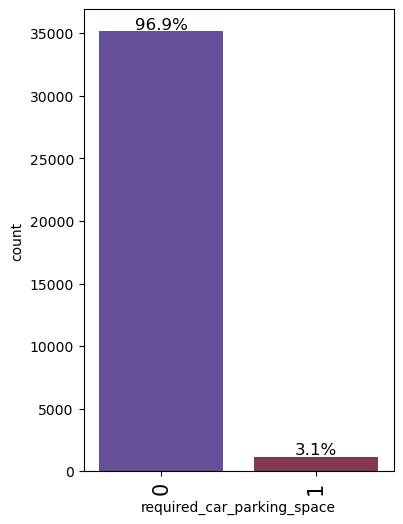

In [27]:
labeled_barplot(data,'required_car_parking_space',perc = True)

* 96.9% bookings did not require a car parking space.
* only 3.1 bookings required a car parking space.

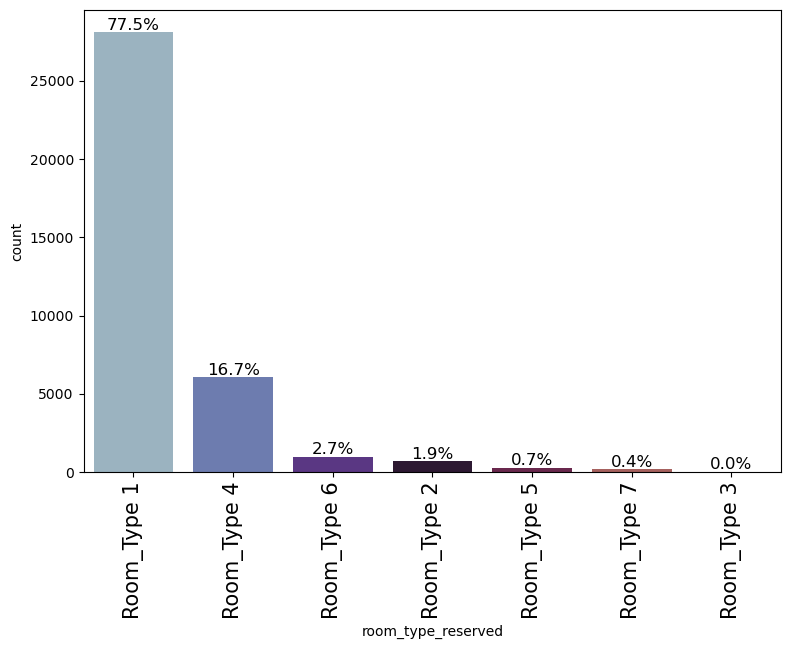

In [28]:
labeled_barplot(data,'room_type_reserved',perc = True)

* 77.5% of the bookings were made for room type 1
* 16.7% of the bookings were made for room type 4
* 2.7 % of the bookings were made for room type 6
* 1.9 % of the bookings were made for room type 2
* 0.7 % of the bookings were made for room type 5
* 0.4 % of the bookings were made for room type 7
* No bookings were made for room type 3

The majority of bookings, 77.5%, were made for Room Type 1

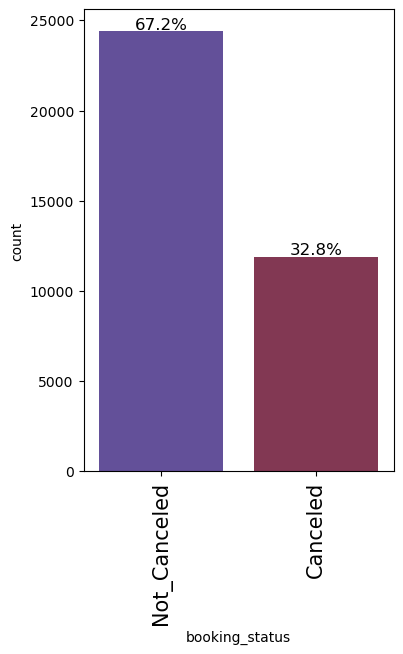

In [29]:
labeled_barplot(data,'booking_status',perc = True)

67.2% of bookings were not cancelled while 32.8% of bookings were cancelled

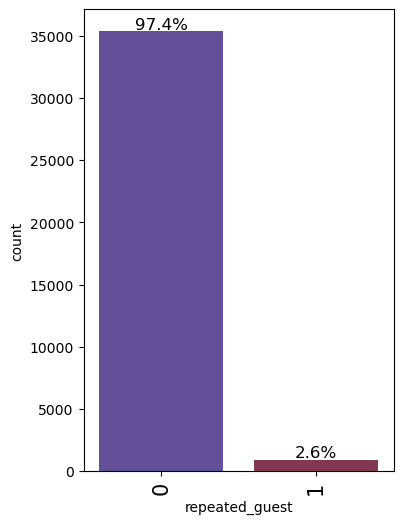

In [30]:
labeled_barplot(data,'repeated_guest',perc = True)

Majority of bookings, accounting for 97.4%, are made by new guests, while only 2.6% of bookings come from repeated guests.

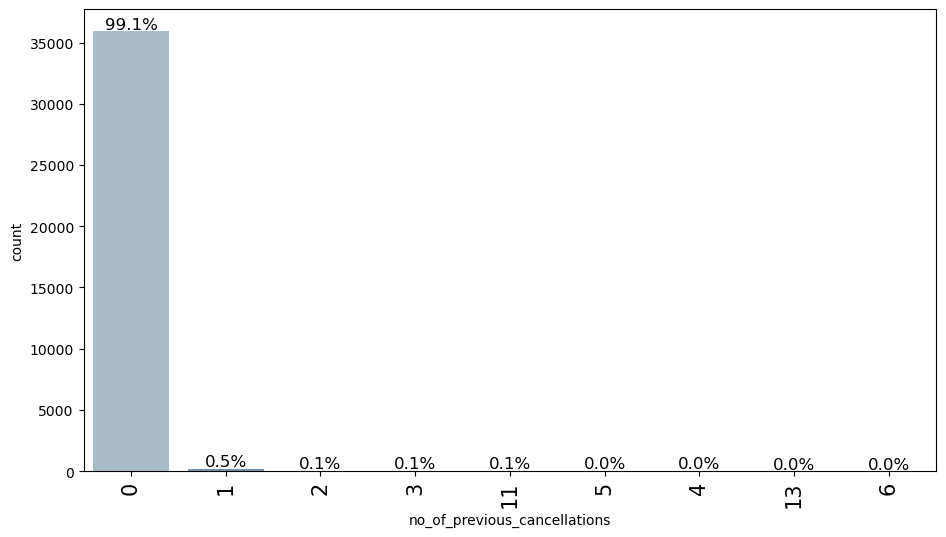

In [31]:
labeled_barplot(data,'no_of_previous_cancellations',perc = True)

99.1% of bookings had no previous cancellations, while only 0.5% of bookings had a single previous cancellation

### Bivariate Analysis

<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

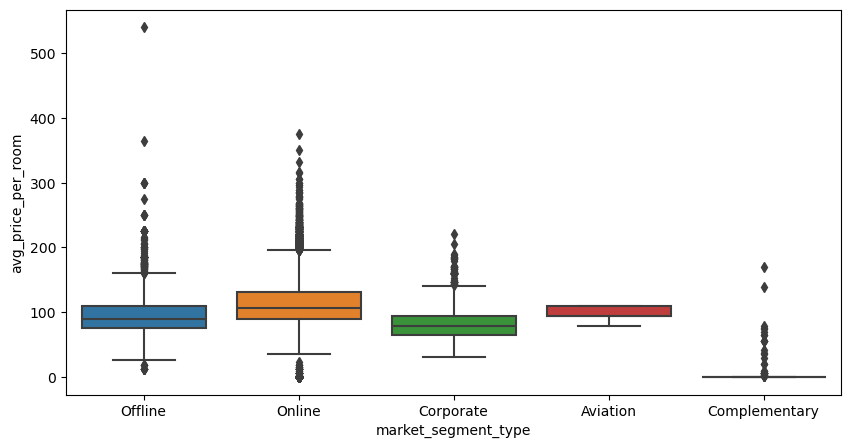

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, y='avg_price_per_room' , x='market_segment_type')

* Online booking are the highest in room price.
* Aviation, Offline, and Corporate are generally slightly lower priced with Corporate edging out for the lowest.
* Complimentary are of course free.

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


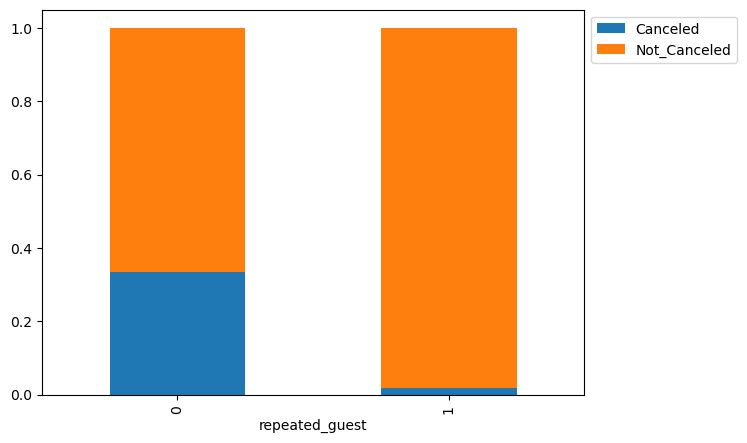

In [33]:
stacked_barplot(data,'repeated_guest','booking_status')

* Most repeat guests do not cancel their bookings, indicating a potential source of brand loyalty among these guests.
* Only 16 repeat guest have cancelled their bookings.

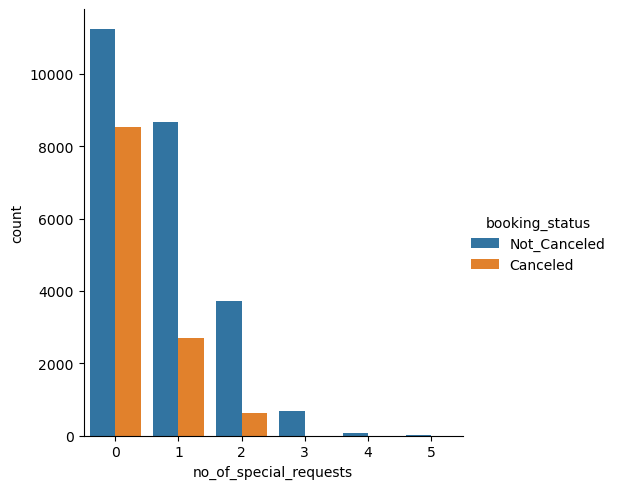

In [34]:
sns.catplot(data=data, x ='no_of_special_requests', hue='booking_status', kind='count' )

The absence of special request increases the likelihood of cancellation, the addition of special request begins to reduce the likelihood of cancellation at one and progressively reduces cancellation to Zero on the instance of a third request.

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


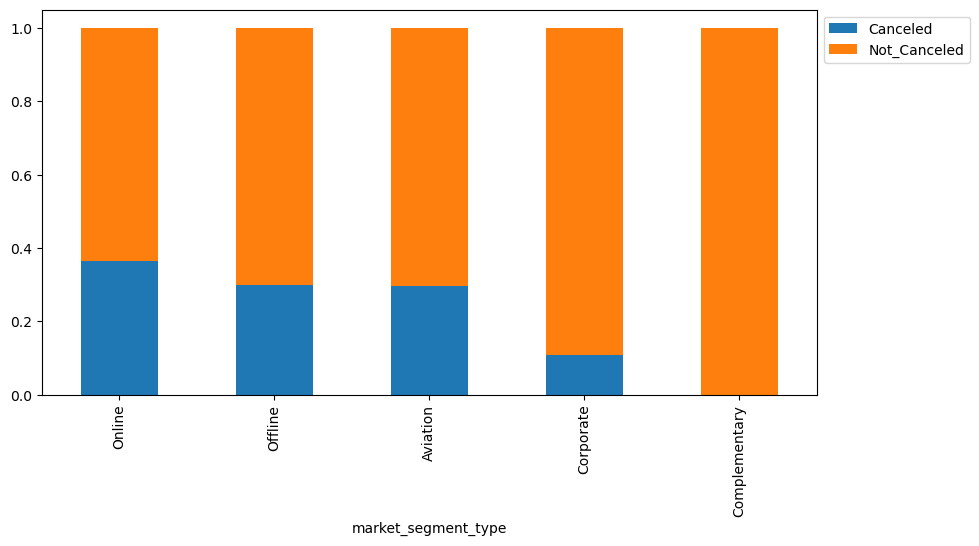

In [35]:
stacked_barplot(data,'market_segment_type','booking_status')

* The online and offline market segments dominate the total bookings.
* Corporate and aviation bookings have lower cancellation rates compared to online and offline bookings.
* Complementary bookings have a 0% cancellation rate, likely because they are provided as a benefit or bonus.

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


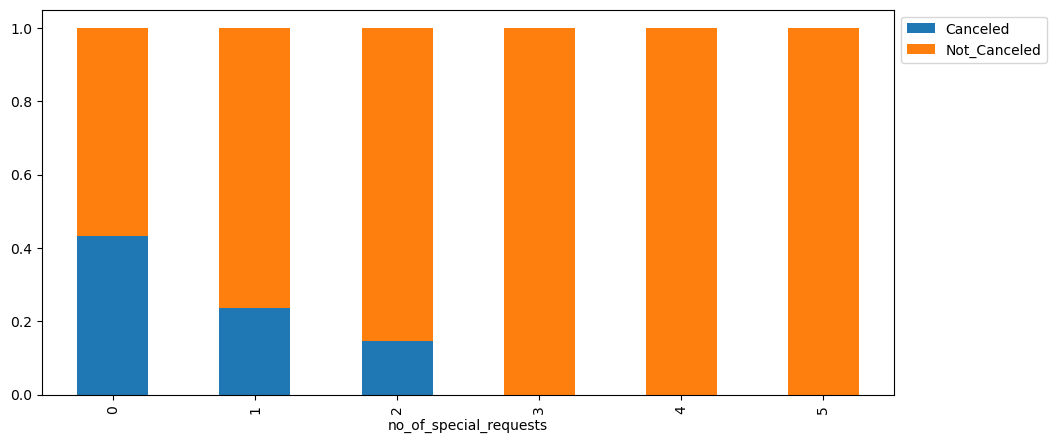

In [36]:
stacked_barplot(data,'no_of_special_requests','booking_status')

The absence of special request increases the likelihood of cancellation, the addition of special request begins to reduce the likelihood of cancellation at one and progressively reduces cancellation to Zero on the instance of a third request.

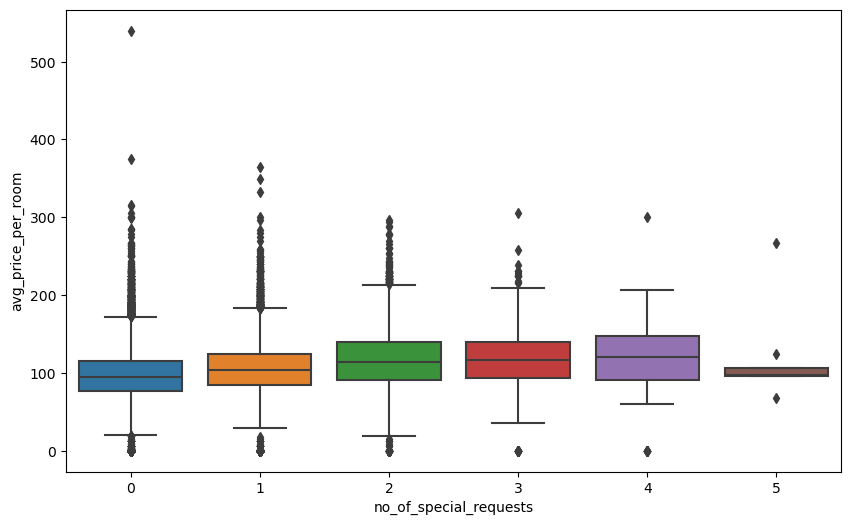

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='no_of_special_requests',y='avg_price_per_room')
plt.show()


The price of the room does not seem to vary too much if there is little requests given, but when there is about 4 or more special requests the price seems to suffer variation

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


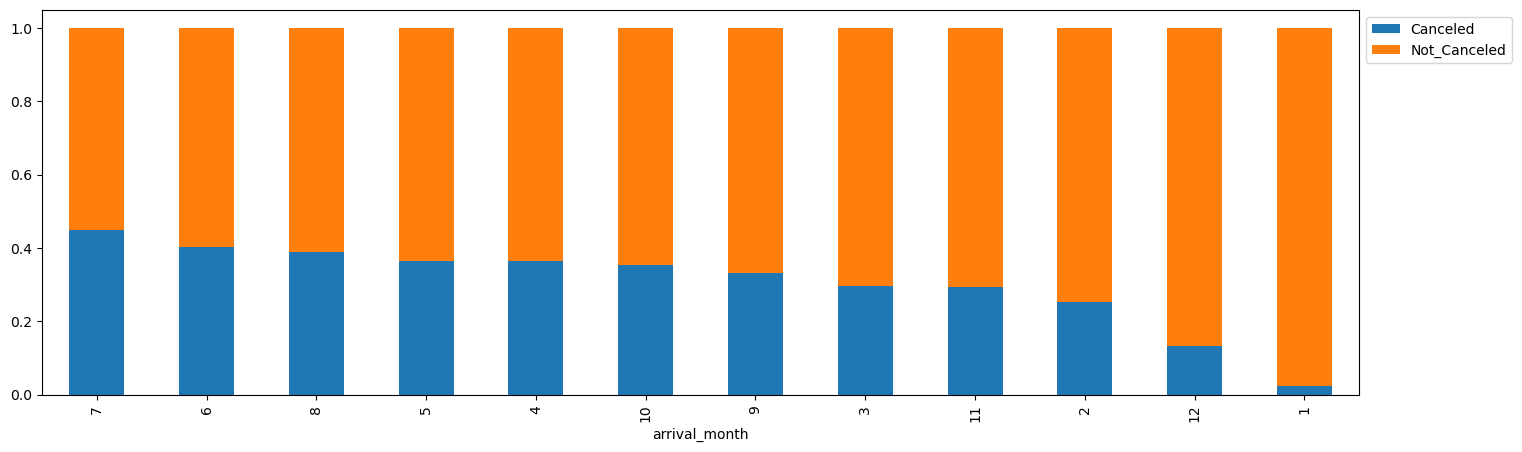

In [38]:
stacked_barplot(data,'arrival_month','booking_status')

* The highest cancellation rates are observed in July (45.0%) and June (40.3%).
* The lowest cancellation rate is in January (2.4%) and December (13.3%).
* Overall, there is significant variation in cancellation rates across different months, with summer months showing higher rates compared to winter months.


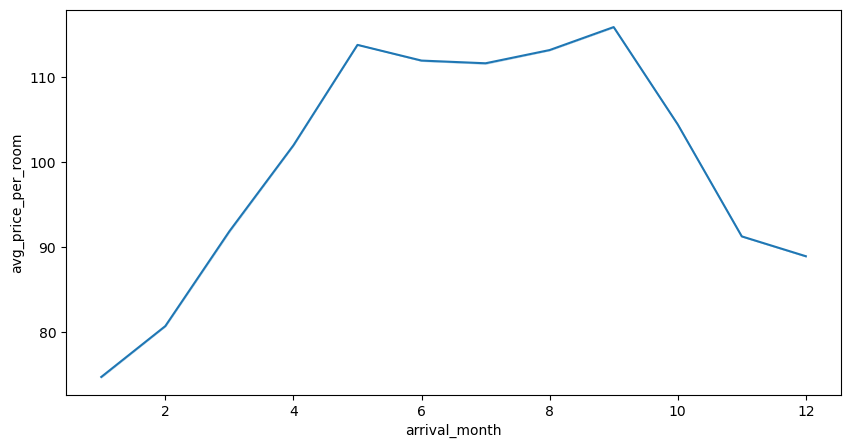

In [39]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='arrival_month',y='avg_price_per_room',ci=False)
plt.show()

The prices are the highest in the summer, since most people go on vacation then it peaks at around October

<Axes: xlabel='booking_status', ylabel='lead_time'>

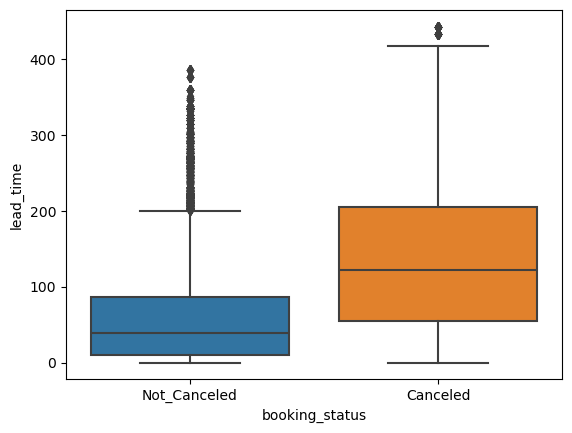

In [40]:
sns.boxplot(data=data, y ='lead_time', x = 'booking_status')

An increase in lead time is observed to significantly influence the likelihood of booking cancellations, with longer lead times generally associated with higher cancellation rates

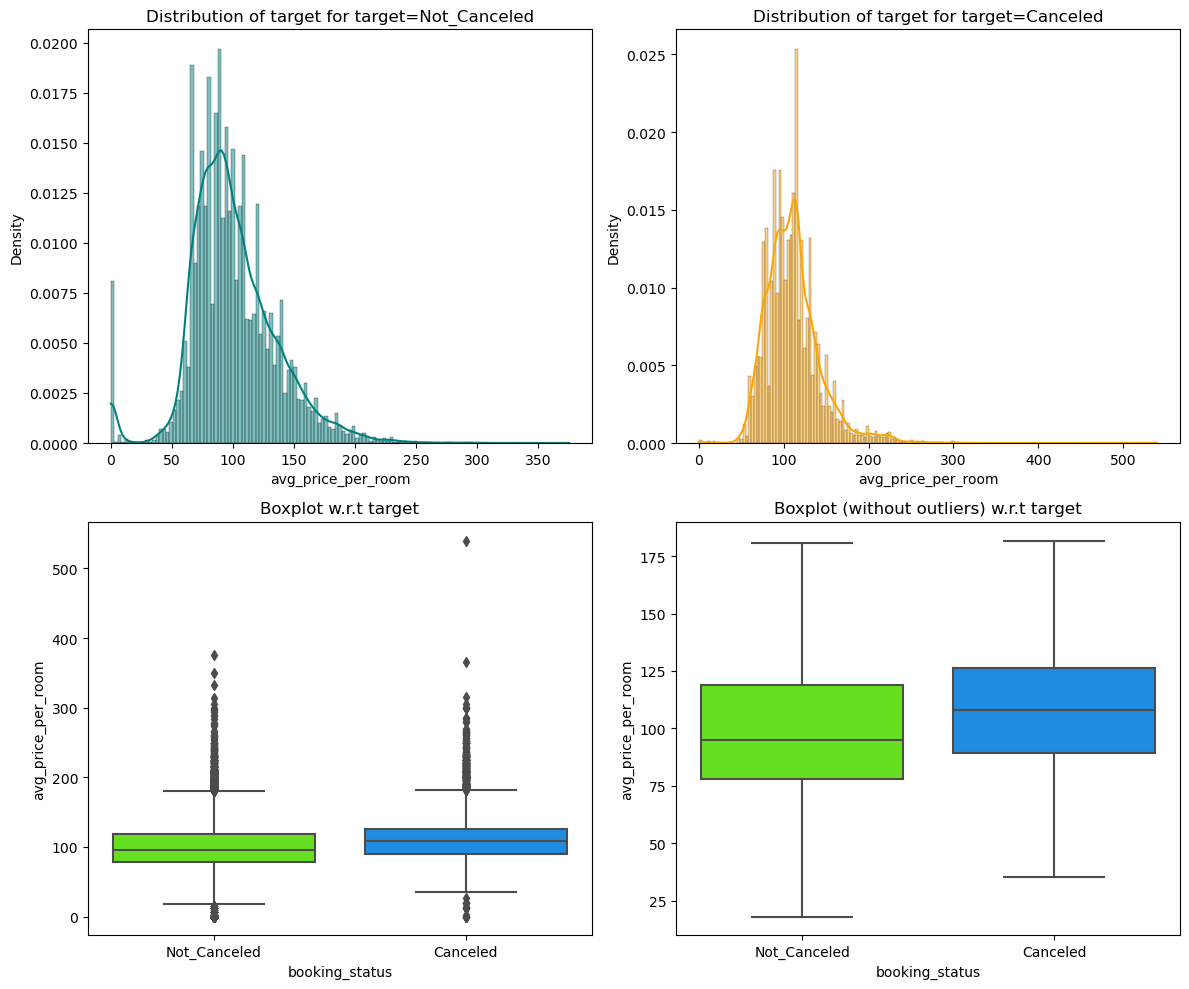

In [41]:
distribution_plot_wrt_target(data, 'avg_price_per_room', 'booking_status')

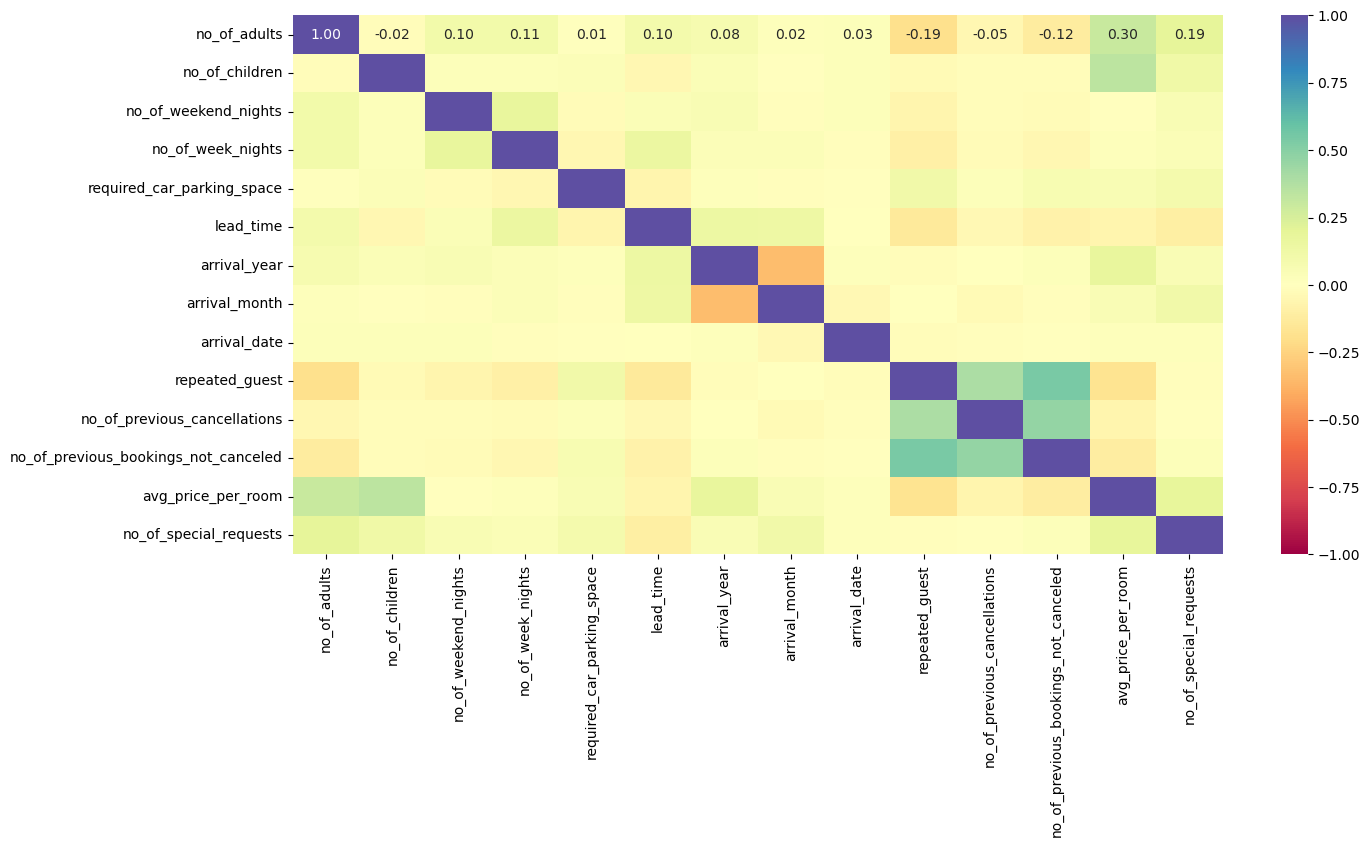

In [42]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There are high correlation between repeated guest and no.of previous bookings not cancelled.
* This shows repeat guests do not cancel their bookings, indicating a potential source of brand loyalty among these guests.
* The correlation between the number of previous cancellations and the number of previous bookings that were not canceled is 0.47, indicating a moderate positive relationship between these two variables.

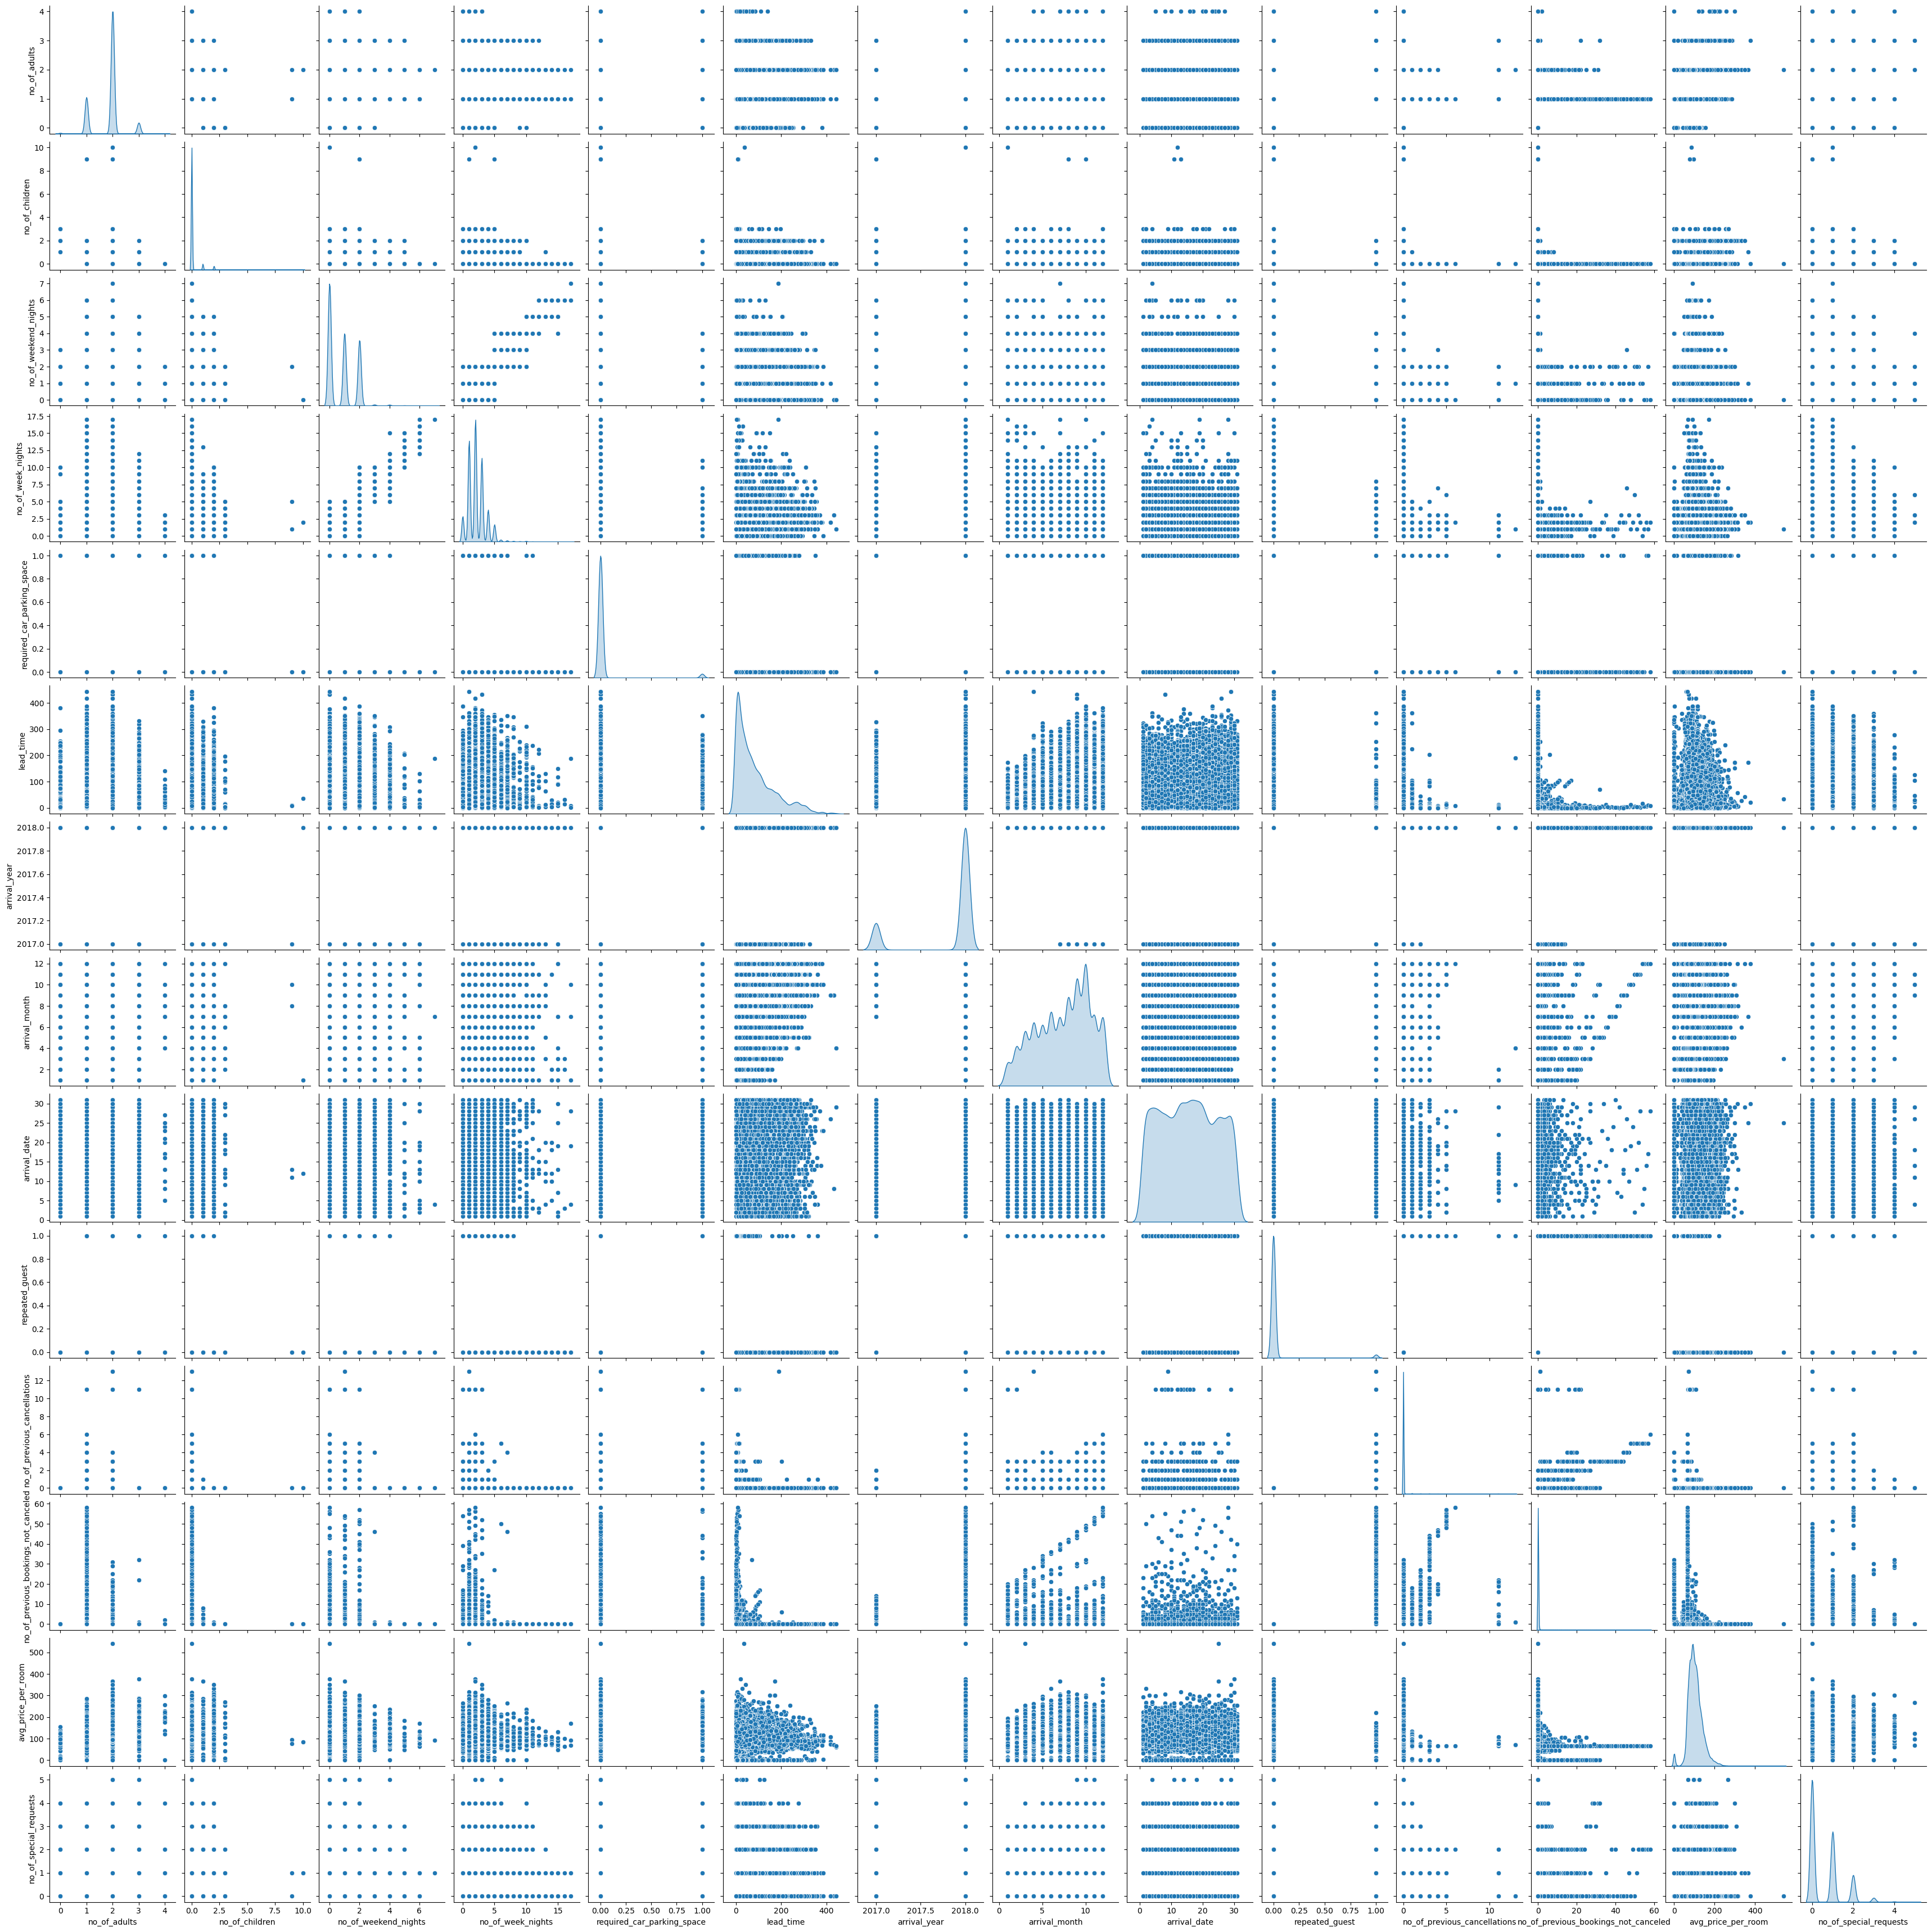

In [43]:
sns.pairplot(
    data, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag

### QUESTIONS

#### 1. What are the busiest months in the hotel?

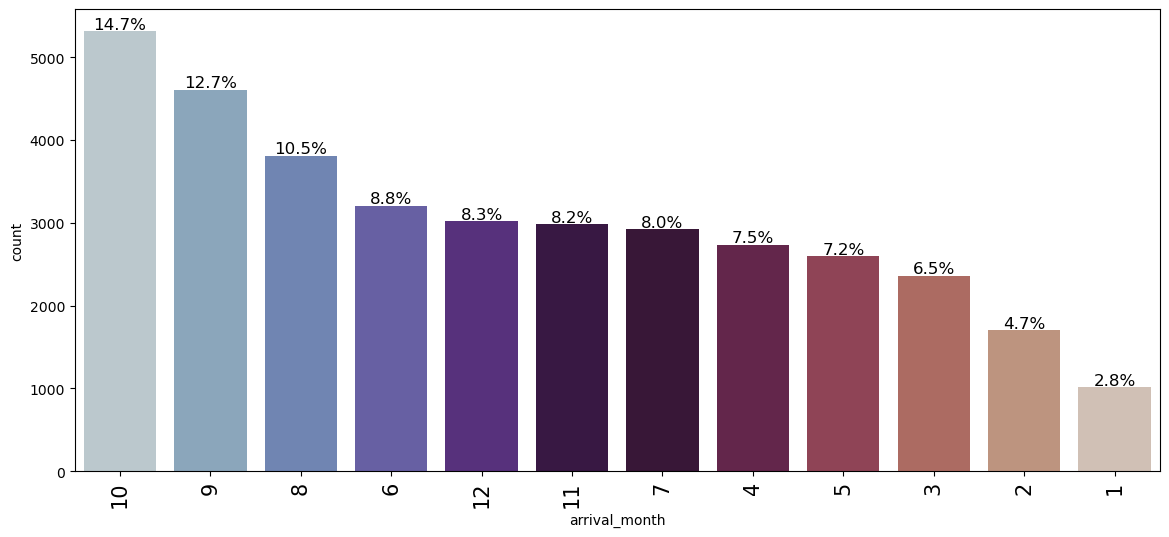

In [44]:
labeled_barplot(data, 'arrival_month',perc= True, n=None)


* From this graph we can say, October month is the busiest months.
* It has 14.7 percentage.
* It has 5317 counts.

#### 2. Which market segment do most of the guests come from?

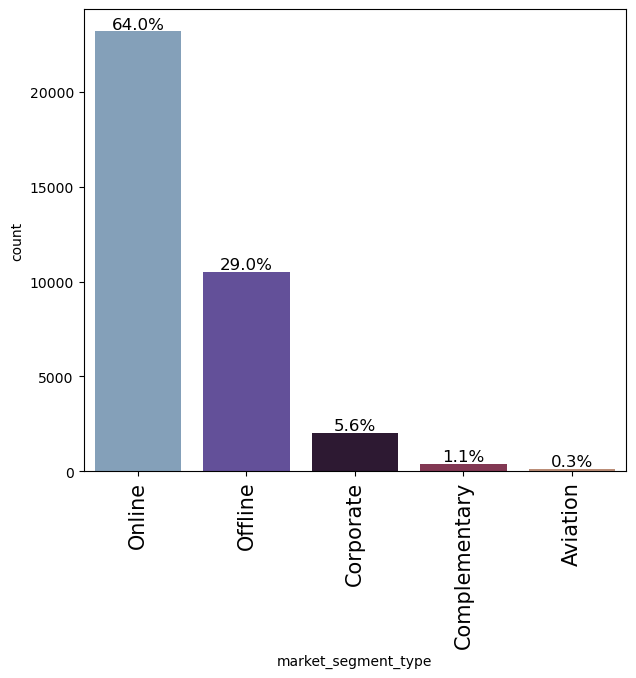

In [45]:
labeled_barplot(data, "market_segment_type",perc=True)

* Online has the highest count 23214
* 64% of the bookings come via the internet.

#### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?


<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

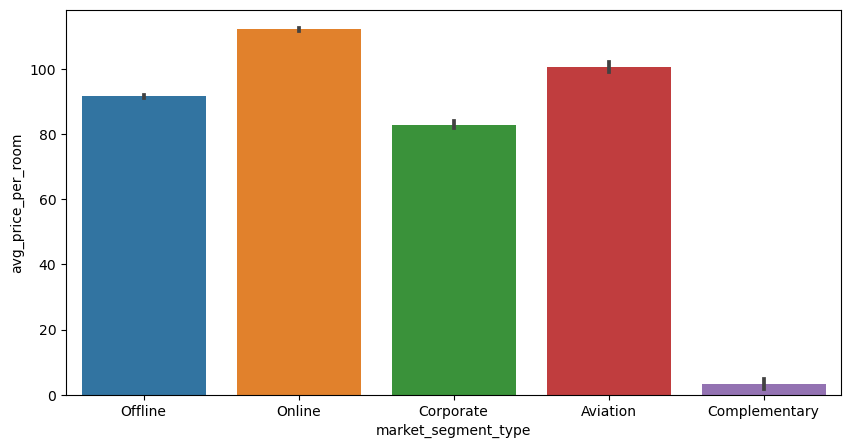

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data, y='avg_price_per_room' , x='market_segment_type')

* Online booking are the highest in room price.
* Aviation, Offline, and Corporate are generally slightly lower priced with Corporate edging out for the lowest.
* Complimentary are of course free.

#### 4. What percentage of bookings are canceled?

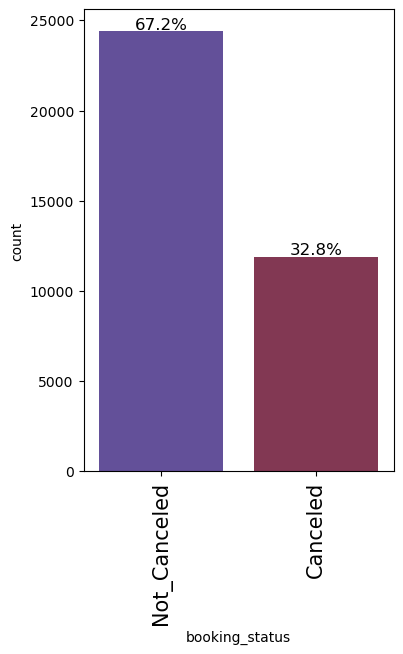

In [47]:
labeled_barplot(data,'booking_status',perc=True)

* 32.8 percentage bookings got cancelled.
* About 1/2 (11885) of bookings are cancelled in the given data.

#### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


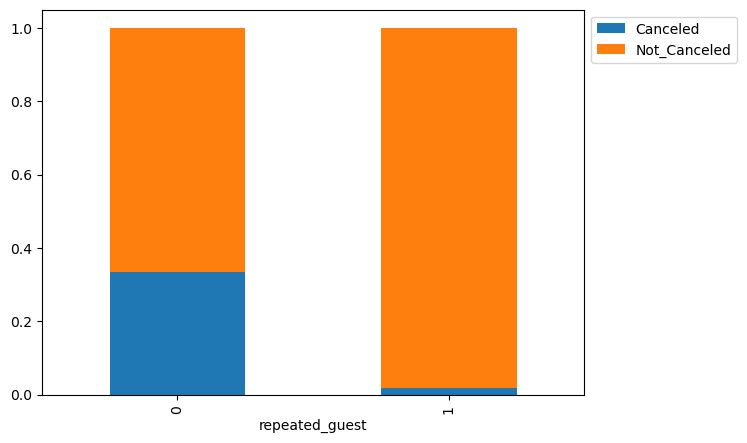

In [48]:
stacked_barplot(data,'repeated_guest','booking_status')

* Only 16 repeated guest have cancelled the bookings.
* 1.72% of repeating guest rarely cancel the bookings.

#### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?


booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


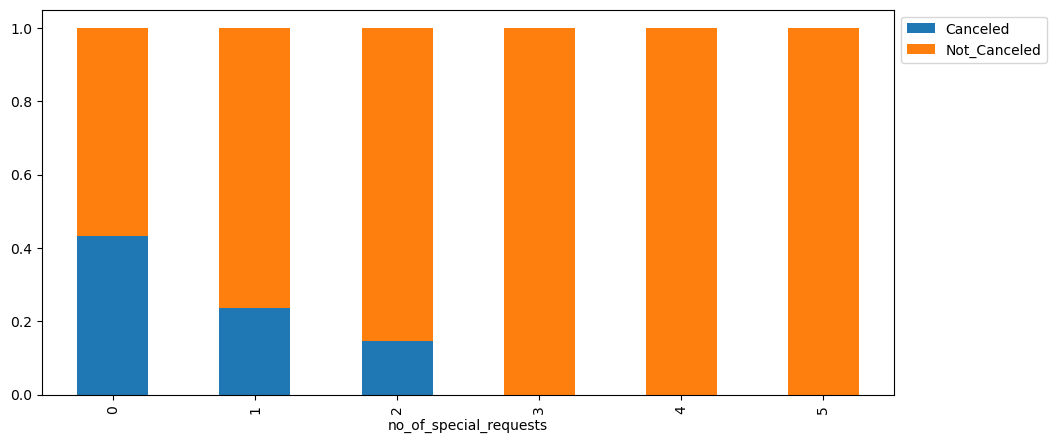

In [49]:
stacked_barplot(data,'no_of_special_requests','booking_status')

* The absence of special request increases the likelihood of cancellation, the addition of special request begins to reduce the likelihood of cancellation at one and progressively reduces cancellation to Zero on the instance of a third request.

    Yes, special requirements affect the booking cancellation.

### Key meaningful observations on individual variables and the relationship between variables
#### 1. Do special requests impact the prices of the room?


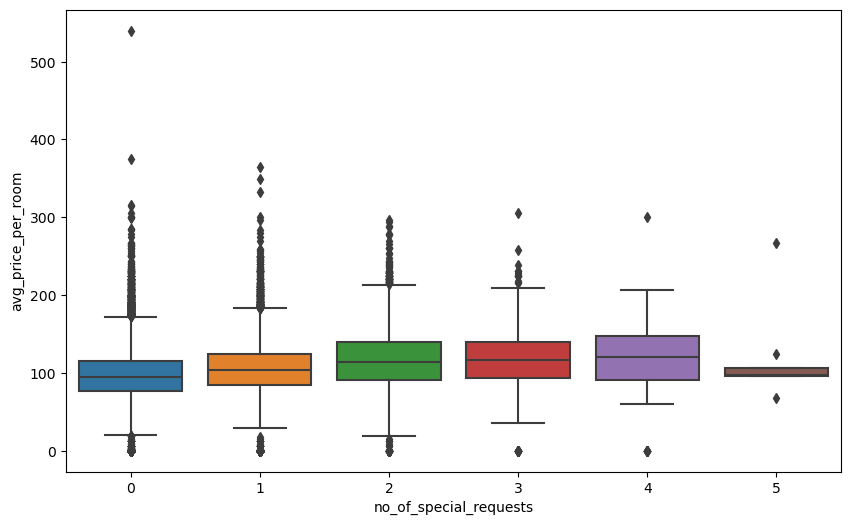

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='no_of_special_requests',y='avg_price_per_room')
plt.show()

The price of the room does not seem to vary too much if there is little requests given, but when there is about 4 or more special requests the price seems to suffer variation

#### 2. How does price per room impact booking status?

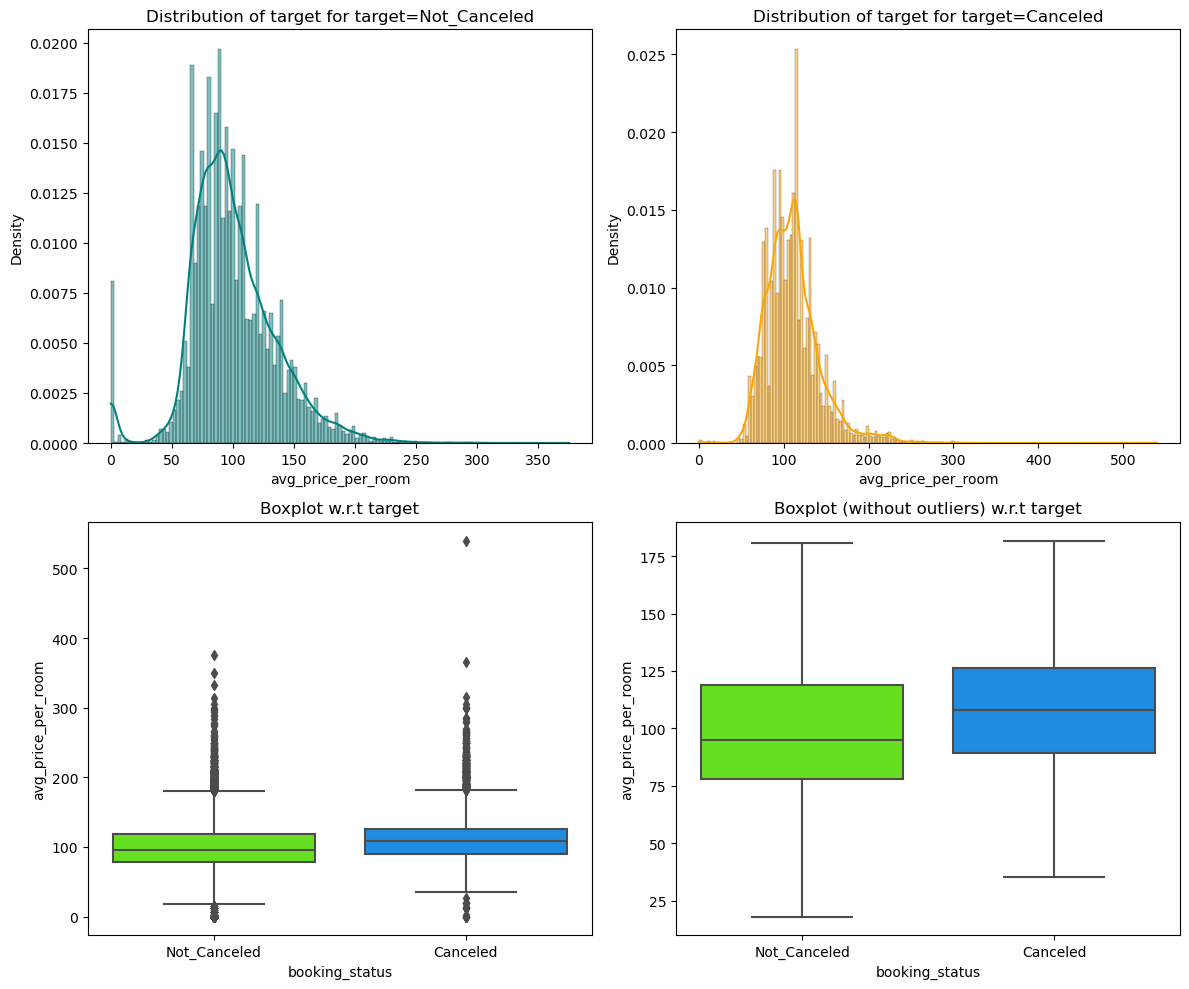

In [51]:
distribution_plot_wrt_target(data, 'avg_price_per_room', 'booking_status')

#### 3. How does lead time impact booking status?

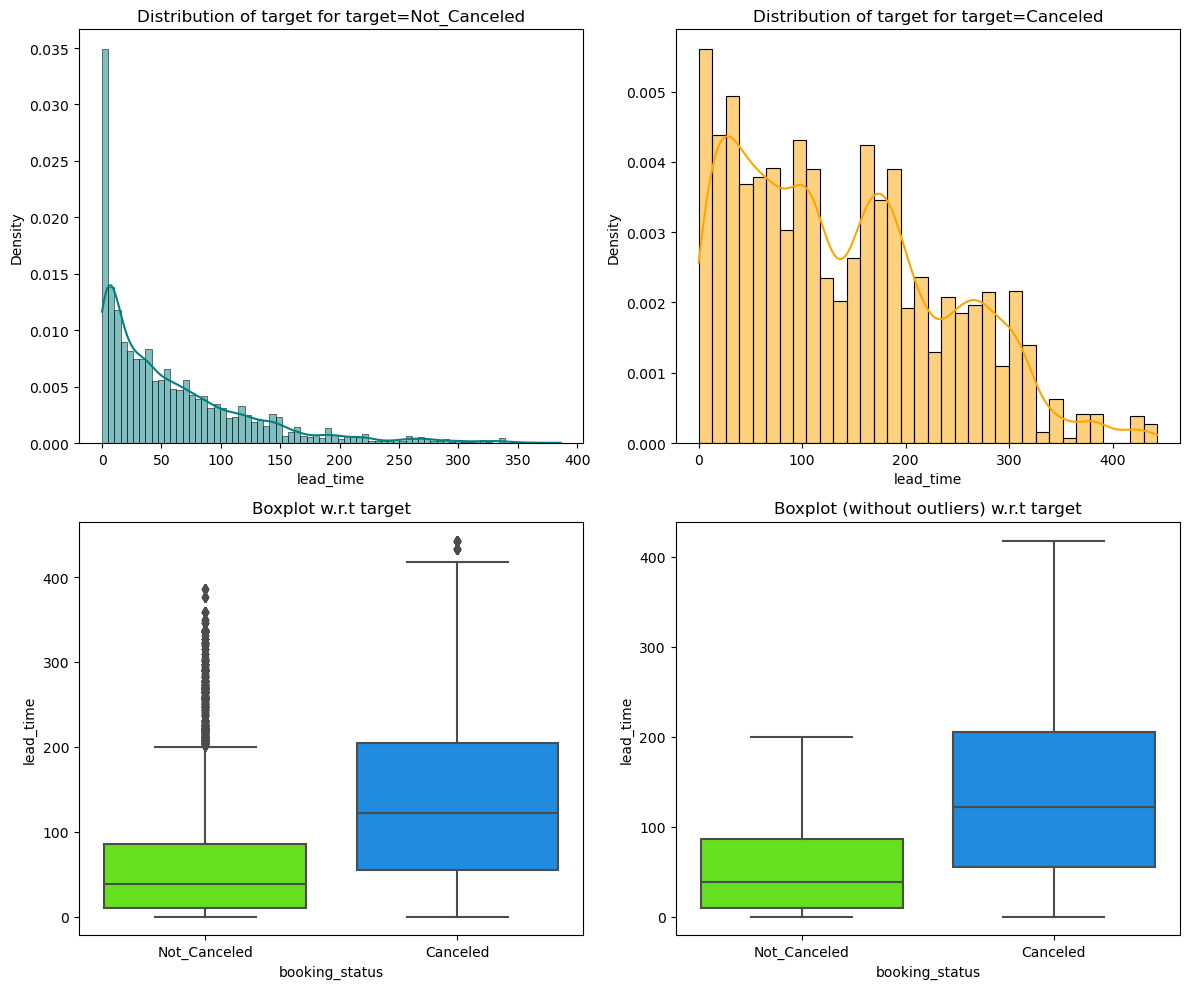

In [52]:
distribution_plot_wrt_target(data, 'lead_time', 'booking_status')

#### 4. Number of bookings cancelled each month

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


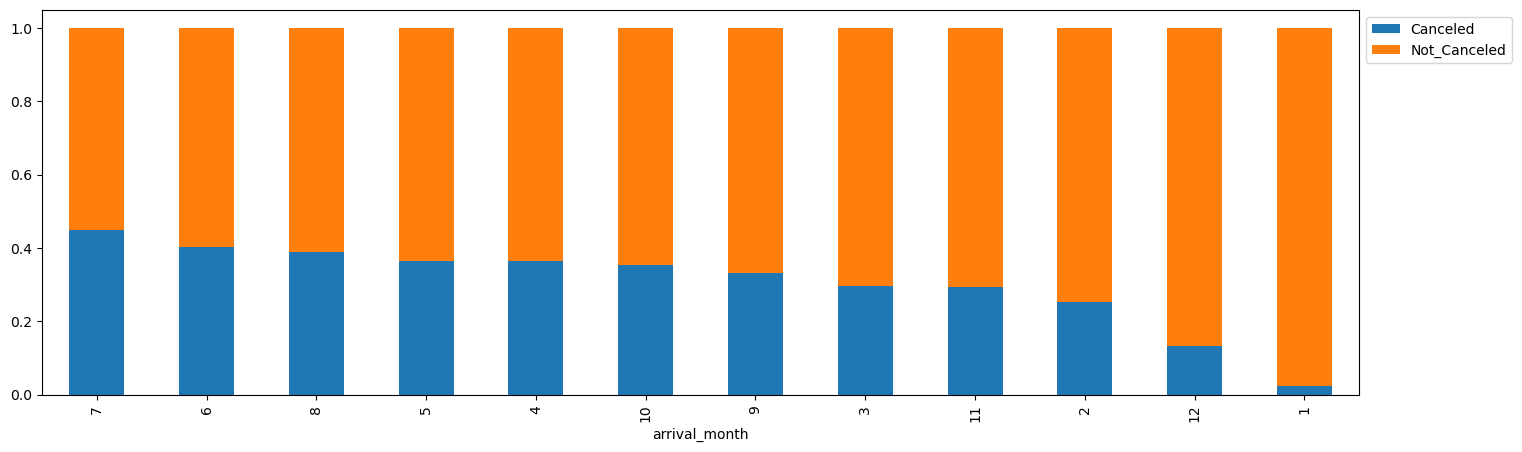

In [53]:
stacked_barplot(data,'arrival_month','booking_status')

July has the most percentage of cancellations and January has the least

In [54]:
#Change Not Cancelled booking to 0 and Cancelled booking as 1 for further analysis
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

In [55]:
family_data = data[(data['no_of_children']>=0) & (data['no_of_adults']>1)]
family_data.shape

(28441, 18)

In [56]:
family_data['no_of_family_members'] = (family_data['no_of_children'] + family_data['no_of_adults'])

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        10     5     15
11                        0     1      1
12                        1     0      1
------------------------------------------------------------------------------------------------------------------------


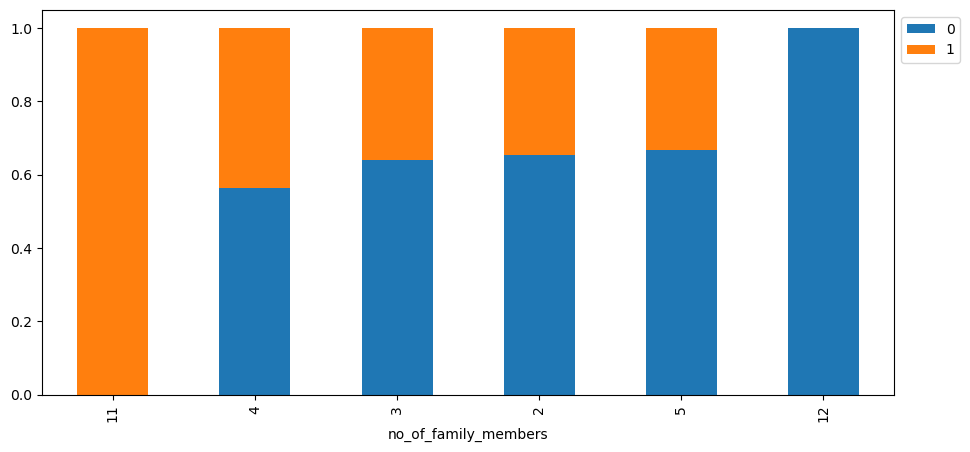

In [57]:
stacked_barplot(family_data,'no_of_family_members','booking_status')

* Families with 2 members make up the majority of the bookings (around 83% of total bookings) and have a cancellation rate consistent with the overall average.
* Families with 4 members have the highest cancellation rate (43.6%), which may suggest that larger family trips face more uncertainty or risk of cancellation.
* The data for families with 5 or more members is minimal and therefore doesn't allow for strong conclusions.

In [58]:
day_data = data[(data['no_of_week_nights']>0) & (data['no_of_weekend_nights']>0)]
day_data.shape

(17094, 18)

In [59]:
day_data['total_days'] = (day_data['no_of_week_nights'] + day_data['no_of_weekend_nights'])

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


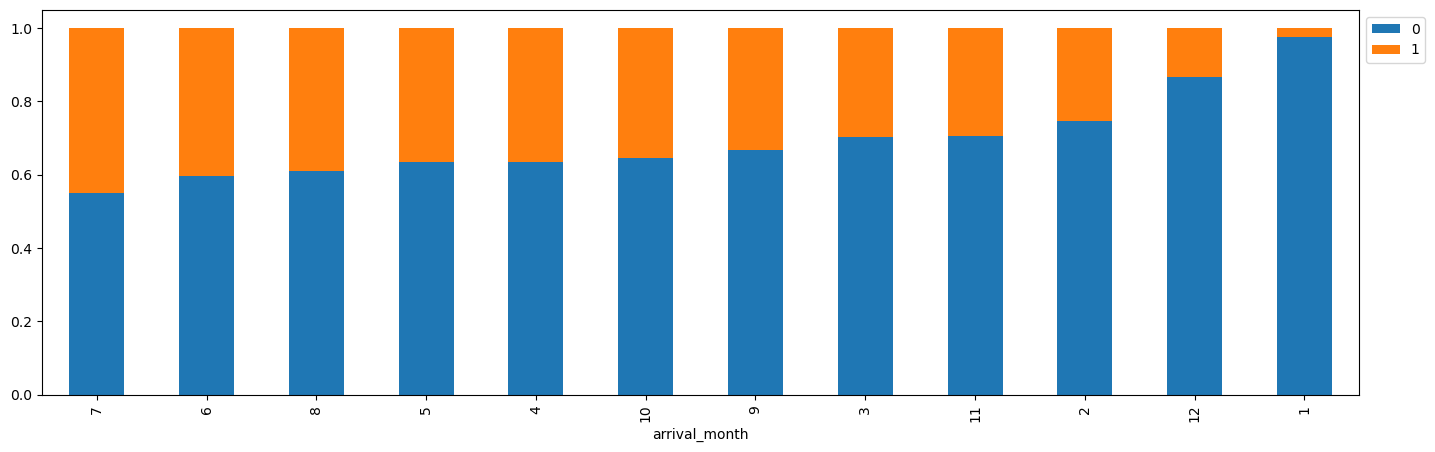

In [60]:
stacked_barplot(data,'arrival_month','booking_status')

•	December and January have the lowest cancellation rates (~13.3% and 2.4%, respectively), indicating these are more stable months for bookings. This may be due to holidays and higher travel commitment.
•	July and August have higher cancellation rates (45% and 39%, respectively), suggesting these months experience more uncertainty in travel plans.
•	October and September are the peak months in terms of booking volume, with October having the highest total bookings but a moderate cancellation rate.


booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


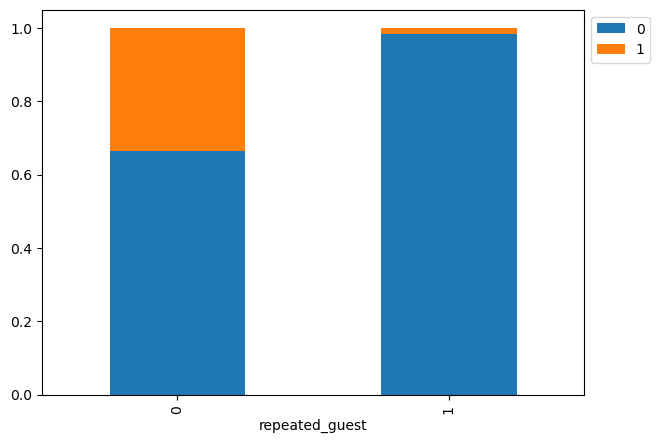

In [61]:
stacked_barplot(data,'repeated_guest','booking_status')

*Repeated guests (those who have stayed before) are far more reliable in terms of keeping their bookings, with an extremely low cancellation rate (1.7%). This suggests that customer loyalty or satisfaction leads to more stable bookings.
*Non-repeated guests have a significantly higher cancellation rate (33.6%), indicating that first-time guests are more likely to cancel their bookings compared to returning customers.
*This insight can be valuable for strategies aimed at customer retention and loyalty programs.

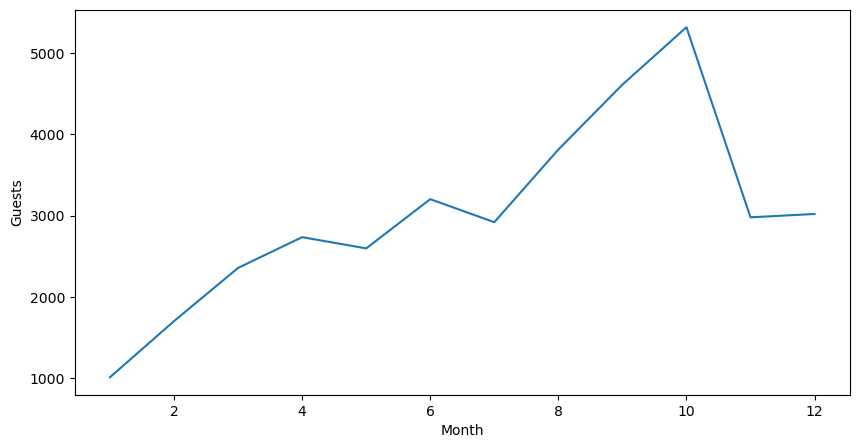

In [62]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

•	The line plot shows a peak in bookings during the month of October, indicating that the majority of bookings were made during this period.

## Data Preprocessing

### Outlier Detection

**Let's check for outliers in the data.**

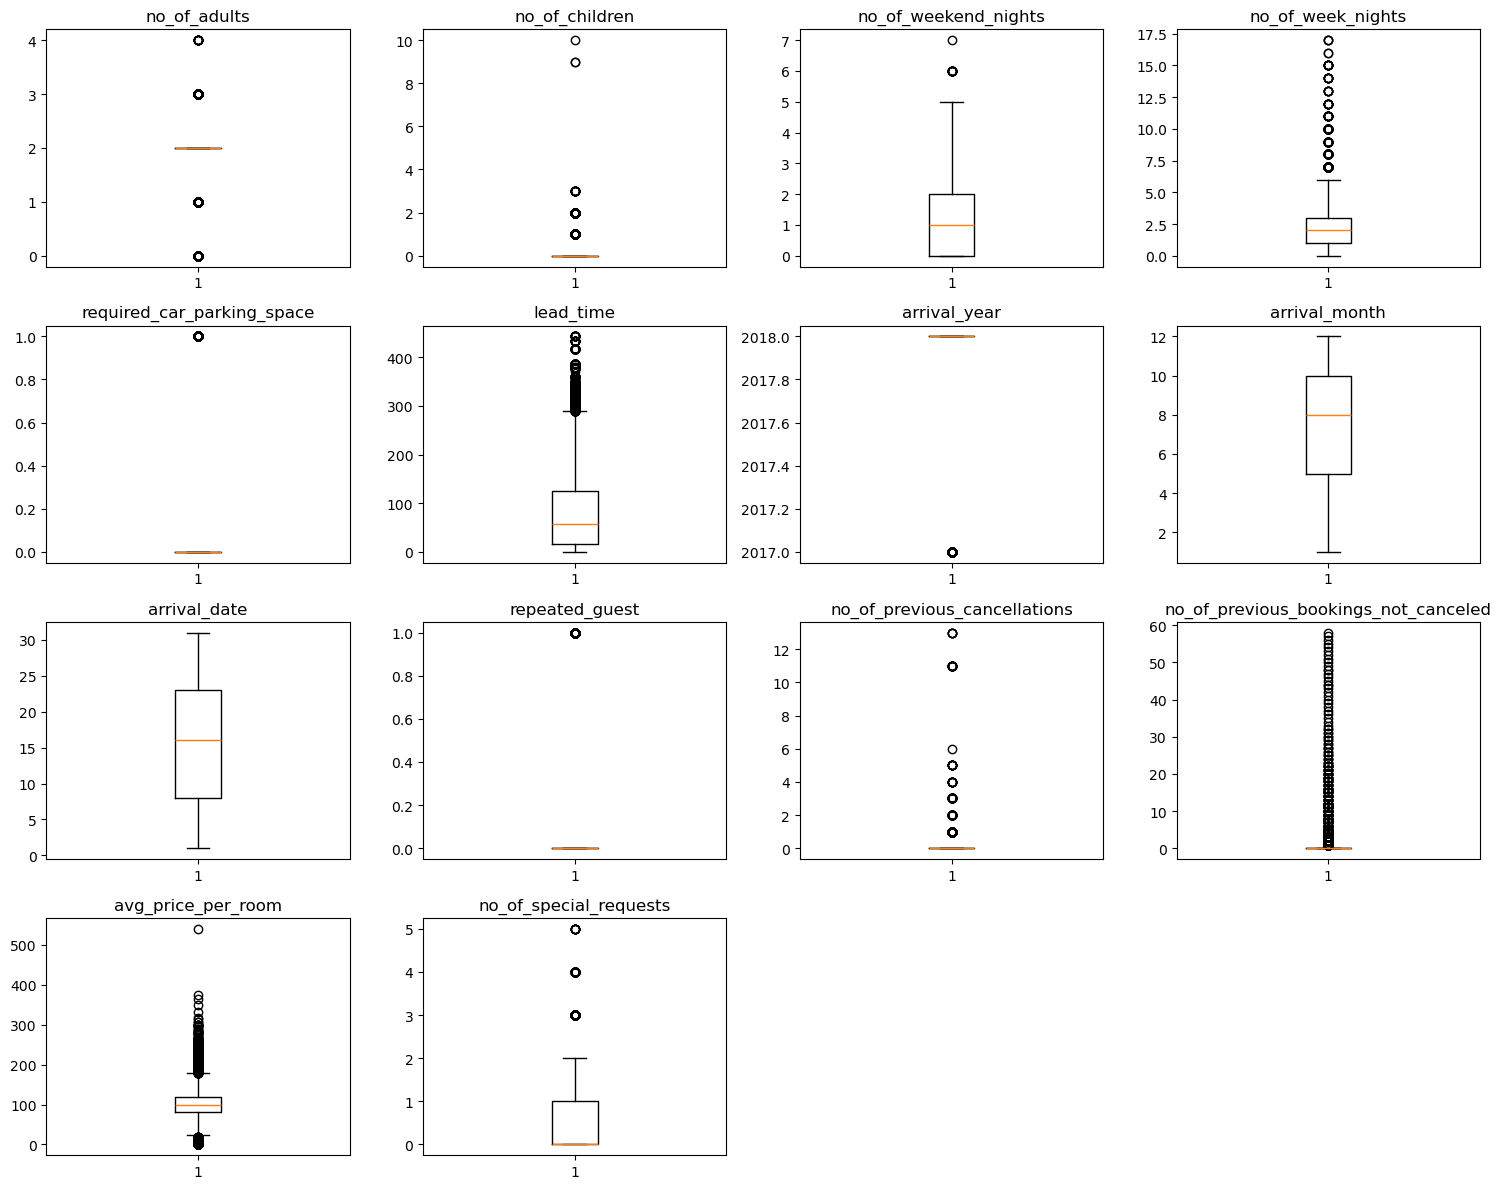

In [63]:
#Outlier detection using boxplot
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
#Dropping booking status
numerical_cols.remove('booking_status')
#Formula for outlier detection
plt.figure(figsize=(15,12))

for i, variable in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    plt.boxplot(data[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for Modeling

In [64]:
X = data.drop(['booking_status'], axis=1)
Y = data['booking_status']
data.drop(["arrival_year"], axis=1)

X = pd.get_dummies(X, drop_first=True)

#Converting values to float
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [65]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


* We had seen that around 67% of observations belongs to class 0 (Not canceled) and 32% observations belongs to class 1 (canceled), and this is preserved in the train and test sets

## Model Building - Logistic Regression

In [66]:
# Ensure y_train is a numeric array
y_train = y_train.astype(float)

# Add an intercept to X_train
X_train = sm.add_constant(X_train)

# Fit the logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

# Print the summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                  0.3293
Time:                        20:43:48   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Observations**

- Negative values of the coefficient show that the probability of Person Cancelling decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of Person Cancelling increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

### Model Performance Evaluation

In [67]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [68]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

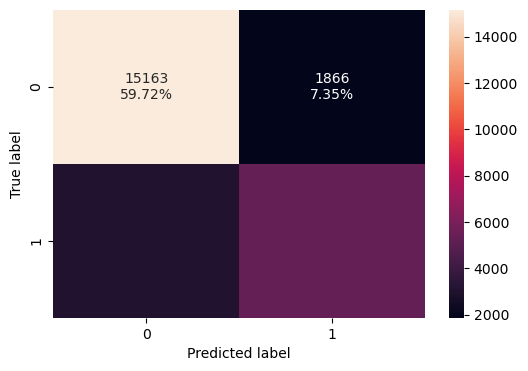

In [69]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [70]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80604 0.63422    0.73975 0.68293

**Observations**

- The f1_score of the model is ~0.68 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

### Detecting and Dealing with Multicollinearity

In [71]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39468156.70600
no_of_adults                                  1.34815
no_of_children                                1.97823
no_of_weekend_nights                          1.06948
no_of_week_nights                             1.09567
required_car_parking_space                    1.03993
lead_time                                     1.39491
arrival_year                                  1.43083
arrival_month                                 1.27567
arrival_date                                  1.00674
repeated_guest                                1.78352
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05042
no_of_special_requests                        1.24728
type_of_meal_plan_Meal Plan 2                 1.27185
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

* `market_segment_type_Corporate`, `market_segment_type_Online` and `market_segment_type_Offline` exhibit high multicollinearity.

**Removing `market_segment_type_Corporate`**

In [72]:
X_train1 = X_train.drop("market_segment_type_Corporate", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39398297.48593
no_of_adults                                  1.34412
no_of_children                                1.97810
no_of_weekend_nights                          1.06742
no_of_week_nights                             1.09382
required_car_parking_space                    1.03992
lead_time                                     1.39417
arrival_year                                  1.42861
arrival_month                                 1.27519
arrival_date                                  1.00672
repeated_guest                                1.77838
no_of_previous_cancellations                  1.39514
no_of_previous_bookings_not_canceled          1.64962
avg_price_per_room                            2.04989
no_of_special_requests                        1.24702
type_of_meal_plan_Meal Plan 2                 1.27165
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

* `market_segment_type_Online` and `market_segment_type_Offline` exhibit high multicollinearity.

**Removing `market_segment_type_Online`**

In [73]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39391371.31459
no_of_adults                                  1.33178
no_of_children                                1.97735
no_of_weekend_nights                          1.06904
no_of_week_nights                             1.09512
required_car_parking_space                    1.03979
lead_time                                     1.39064
arrival_year                                  1.42838
arrival_month                                 1.27463
arrival_date                                  1.00672
repeated_guest                                1.78019
no_of_previous_cancellations                  1.39545
no_of_previous_bookings_not_canceled          1.65175
avg_price_per_room                            2.04959
no_of_special_requests                        1.24242
type_of_meal_plan_Meal Plan 2                 1.27150
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

* Dropping market_segment_type_Online fixes the multicollinearity in market_segment.

In [74]:
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train)

Training performance:


C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Accuracy  Recall  Precision      F1
0   0.80577 0.63374    0.73929 0.68246

* No significant change in the model performance.

**Observations:**
1.`market_segment_type_Corporate`, `market_segment_type_Online` and `market_segment_type_Offline` doesn't have a significant impact on the model performance.
2. We can choose any model to proceed to the next steps.

In [75]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                  0.3292
Time:                        20:43:52   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -933.3324    120.655     -7.736      0.000   -1169.813    -696.852
no_of_adults                             0.1060      

### Removing high p-value variables

In [76]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [77]:
X_train2 = X_train1[selected_features]

In [78]:
logit3 = sm.Logit(y_train, X_train2.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                  0.3283
Time:                        20:43:53   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final ones and *lg3* as final model.**

### Coefficient Interpretations

* Coefficient of no_of_adults, no_of_children, no_of_weekend_nights, lead_time ,arrival_year, no_of_previous_cancellations, type_of_meal_plan_Meal Plan 2, room_type_reserved_Room_Type 4, and market_segment_type_Online are positive an increase in these will lead to increase in chances of cancelling on booking.

* Coefficient of required_car_parking_space, repeated_guest, no_of_special_requests, room_type_reserved_Room_Type 2, and market_segment_type_Offline are negative increase in these will lead to decrease in chances of cancelling on booking.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [79]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11475         1.16436               1.11475   
Change_odd% -100.00000      11.47536        16.43601              11.47526   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04264                     0.20305    1.01584   
Change_odd%            4.26363                   -79.69523    1.58352   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57324        0.95853         0.06480   
Change_odd%      57.32351       -4.14725       -93.52026   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25716             1.01935   
Change_odd%                      25.71567             1.93479   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22994                        1.17992   
Change_odd%               -77.00595                       17.99156   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33089                         0.70046   
Change_odd%                        33.08924                       -29.95389   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75383                         0.47940   
Change_odd%                       -24.61701                       -52.05967   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.38099                         0.23903   
Change_odd%                       -61.90093                       -76.09669   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45258                      0.16750  
Change_odd%                      -54.74162                    -83.24963

**Coefficient interpretations**
* Repeated Guest: Being a repeated guest reduces the odds of cancellation by 95.21%, making it the strongest factor against cancellation.

* Required Car Parking Space: Guests who request parking are 74% less likely to cancel their bookings.

* Market Segment (Online): Online bookings are 176.75% more likely to cancel compared to other segments.

* Number of Special Requests: Each additional special request decreases the odds of cancellation by 76.23%, indicating that guests with more requests are less likely to cancel.

* Number of Children: Each additional child increases the odds of cancellation by 47.58%, suggesting family bookings are more likely to cancel.


**Interpretation for other attributes can be done similarly.**

### Checking performance of the new model

**Training set performance**

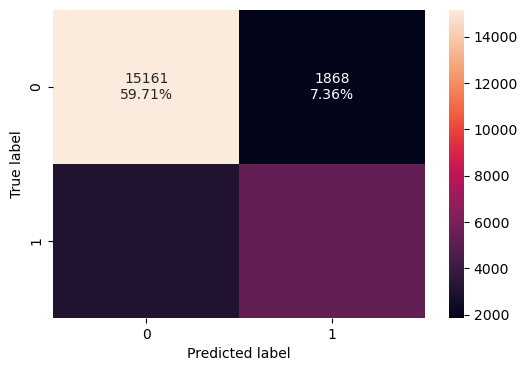

In [80]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train)

In [81]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80541 0.63255    0.73903 0.68166

**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [82]:
X_test = sm.add_constant(X_test, has_constant='add')
X_test = X_test[list(X_train2.columns)]

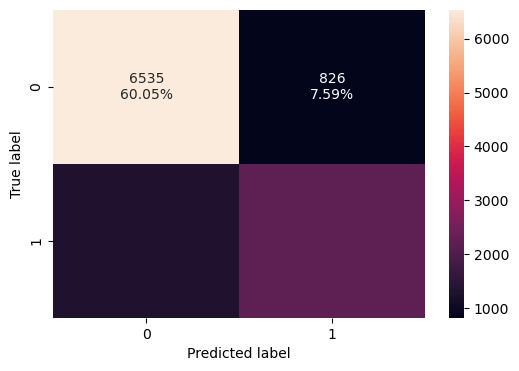

In [83]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test, y_test)

In [84]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80465 0.63089    0.72900 0.67641

 The model is giving a good f1_score of ~0.681 and ~0.676 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

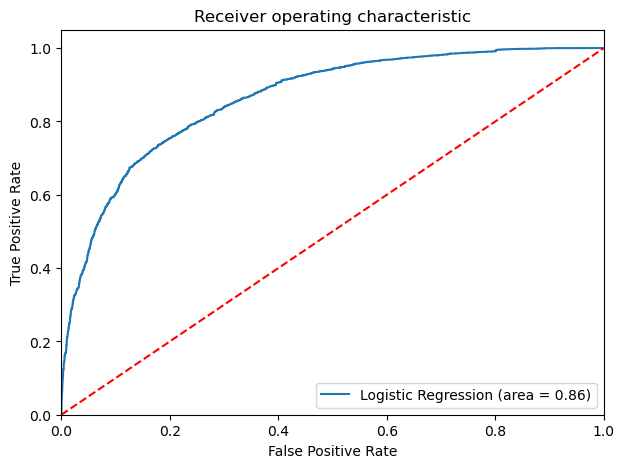

In [85]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [86]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.371046662348869


**Checking model performance on training set**

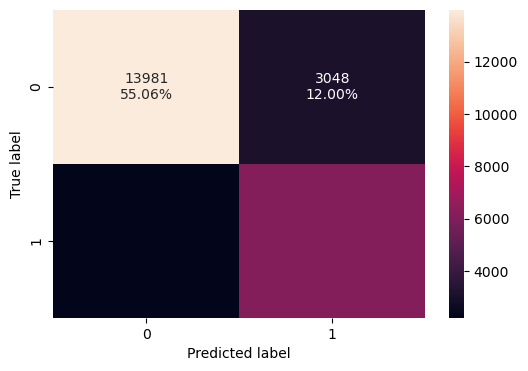

In [87]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [88]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79289 0.73562    0.66870 0.70056

* Precision of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

**Checking model performance on test set**

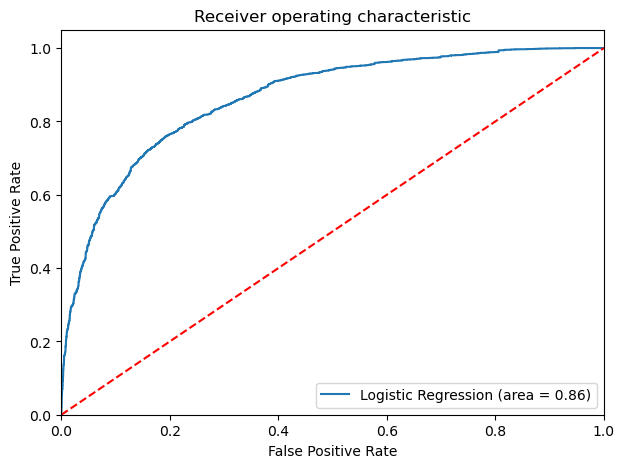

In [89]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

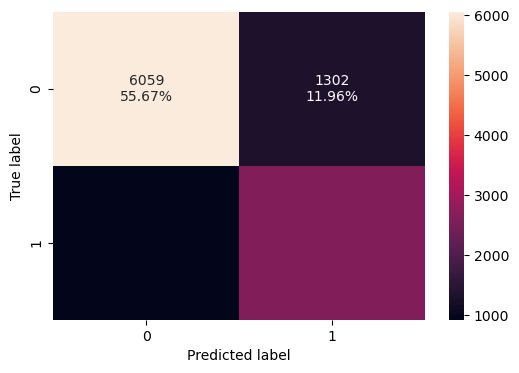

In [90]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test, y_test, threshold=optimal_threshold_auc_roc)

In [91]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79601 0.73935    0.66667 0.70113

### Precision-Recall Curve

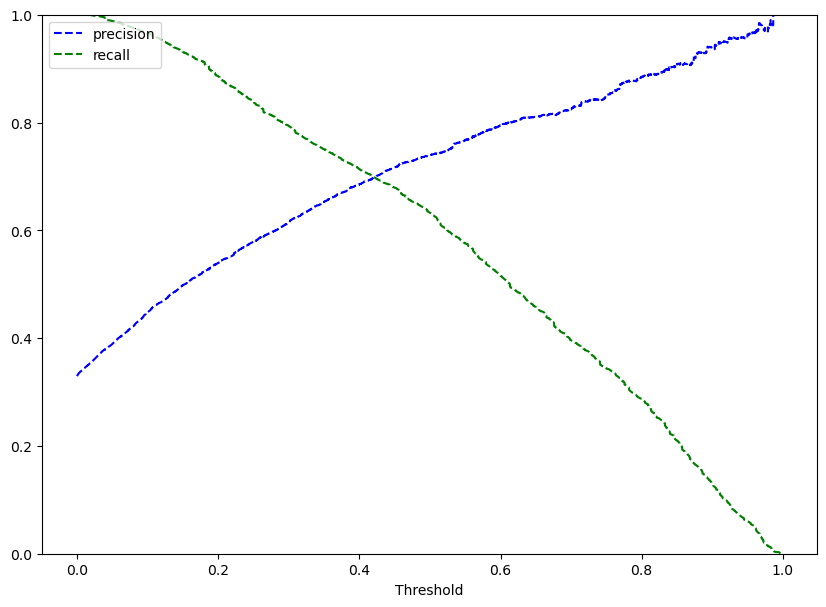

In [92]:
y_scores = lg3.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [93]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set**

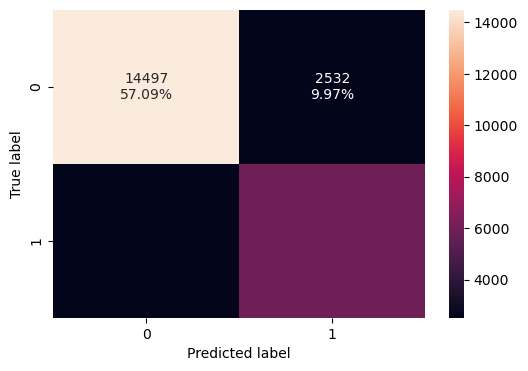

In [94]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train, threshold= optimal_threshold_curve)

In [95]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80128 0.69939    0.69789 0.69864

* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.42 as the optimal threshold.

**Checking model performance on test set**

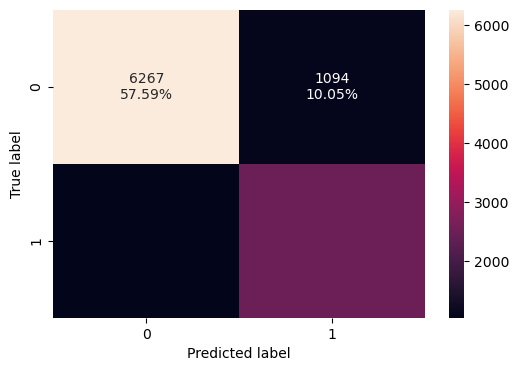

In [96]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test, y_test, threshold=optimal_threshold_curve)

In [97]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80364 0.70386    0.69381 0.69880

## Model Performance Comparison and Final Model Selection

In [98]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression- 0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80541   
Recall                                         0.63255   
Precision                                      0.73903   
F1                                             0.68166   

           Logistic Regression- 0.37 Threshold  \
Accuracy                               0.79289   
Recall                                 0.73562   
Precision                              0.66870   
F1                                     0.70056   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80128  
Recall                                0.69939  
Precision                             0.69789  
F1                                    0.69864

In [99]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80465   
Recall                                         0.63089   
Precision                                      0.72900   
F1                                             0.67641   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79601   
Recall                                0.73935   
Precision                             0.66667   
F1                                    0.70113   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80364  
Recall                                0.70386  
Precision                             0.69381  
F1                                    0.69880

- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a Optimal threshold using AUC-ROC curve(0.37) is giving the best F1 score. Therefore it can be selected as the final model

## KNN Classifier (sklearn)

### Encoding categorical variables

In [100]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

In [101]:
# one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

#Converting values to float
X = X.astype(float)

In [102]:
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0       2.00000         0.00000               1.00000            2.00000   
1       2.00000         0.00000               2.00000            3.00000   
2       1.00000         0.00000               2.00000            1.00000   
3       2.00000         0.00000               0.00000            2.00000   
4       2.00000         0.00000               1.00000            1.00000   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                     0.00000  224.00000    2017.00000       10.00000   
1                     0.00000    5.00000    2018.00000       11.00000   
2                     0.00000    1.00000    2018.00000        2.00000   
3                     0.00000  211.00000    2018.00000        5.00000   
4                     0.00000   48.00000    2018.00000        4.00000   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0       2.00000         0.00000                       0.00000   
1       6.00000         0.00000                       0.00000   
2      28.00000         0.00000                       0.00000   
3      20.00000         0.00000                       0.00000   
4      11.00000         0.00000                       0.00000   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                               0.00000            65.00000   
1                               0.00000           106.68000   
2                               0.00000            60.00000   
3                               0.00000           100.00000   
4                               0.00000            94.50000   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                 0.00000                        0.00000   
1                 1.00000                        0.00000   
2                 0.00000                        0.00000   
3                 0.00000                        0.00000   
4                 0.00000                        0.00000   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                        0.00000                         0.00000   
1                        0.00000                         1.00000   
2                        0.00000                         0.00000   
3                        0.00000                         0.00000   
4                        0.00000                         1.00000   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                            0.00000                        0.00000   
1                            0.00000                        0.00000   
2                            0.00000                        0.00000   
3                            0.00000  

In [103]:
num_columns = ['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights','required_car_parking_space','lead_time','arrival_month','arrival_year','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

In [104]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(X[num_columns])

# Transform selected columns in X using the fitted scaler

X[num_columns] = scaler.transform(X[num_columns])

In [105]:
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0       0.29889        -0.26147               0.21740           -0.14480   
1       0.29889        -0.26147               1.36599            0.56397   
2      -1.62898        -0.26147               1.36599           -0.85358   
3       0.29889        -0.26147              -0.93119           -0.14480   
4       0.29889        -0.26147               0.21740           -0.85358   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                    -0.17882    1.61490      -2.13747        0.83924   
1                    -0.17882   -0.93370       0.46784        1.16499   
2                    -0.17882   -0.98025       0.46784       -1.76675   
3                    -0.17882    1.46361       0.46784       -0.78950   
4                    -0.17882   -0.43329       0.46784       -1.11525   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0      -1.55566        -0.16221                      -0.06339   
1      -1.09801        -0.16221                      -0.06339   
2       1.41906        -0.16221                      -0.06339   
3       0.50376        -0.16221                      -0.06339   
4      -0.52595        -0.16221                      -0.06339   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                              -0.08746            -1.09503   
1                              -0.08746             0.09281   
2                              -0.08746            -1.23753   
3                              -0.08746            -0.09757   
4                              -0.08746            -0.25431   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                -0.78814                        0.00000   
1                 0.48376                        0.00000   
2                -0.78814                        0.00000   
3                -0.78814                        0.00000   
4                -0.78814                        0.00000   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                        0.00000                         0.00000   
1                        0.00000                         1.00000   
2                        0.00000                         0.00000   
3                        0.00000                         0.00000   
4                        0.00000                         1.00000   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                            0.00000                        0.00000   
1                            0.00000                        0.00000   
2                            0.00000                        0.00000   
3                            0.00000  

### Train Test Split

In [106]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [107]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


* We had seen that around 67.06% of observations belongs to class 0 and 3.29% observations belongs to class 1 , and this is preserved in the train and test sets

## Model Building

### Model Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a booking cancellation will not cancelled but in reality, the booking will cancel (FN)
- Predicting a booking cancellation will cancel but in reality, the booking will not cancel (FP)

**Which case is more important?**

- If we predict that a booking cancellation will not cancelled but in reality, the booking will cancel then the hotel  will have to bear the cost of cancellation like revenue loss
- If we predict that a booking cancellation will cancel but in reality, the booking will not cancel  then the hotel will have to arrange rooms in other hotel for rental or they should give discount 
- This cost is generally less compared to the cost of cancellation.

**How to reduce the losses?**

The Hotel would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [108]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [109]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### K- Nearest Neighbor

In order to optimize our model, it's essential to experiment with different values of k to find the most suitable fit for our data. We can commence this process by setting k equal to 3 and gradually exploring other values to assess their impact on the model's performance.

- We'll only consider odd values of K as the classification will be done based on majority voting.

#### K=3

In [110]:
# instantiate learning model (k = 3)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [111]:
pip install threadpoolctl==3.1.0

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


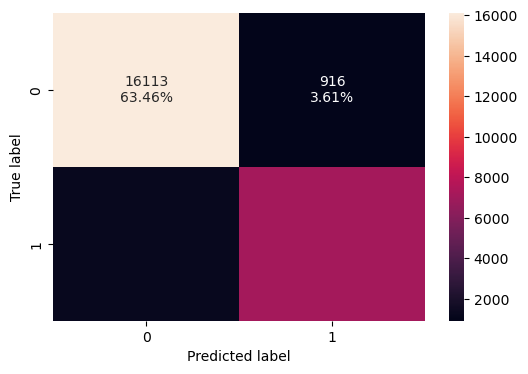

In [112]:
confusion_matrix_sklearn(knn_3, X_train, y_train)

In [113]:
knn_perf_train_3 = model_performance_classification_sklearn(
    knn_3, X_train, y_train
)
knn_perf_train_3

Accuracy  Recall  Precision      F1
0   0.91588 0.85412    0.88634 0.86993

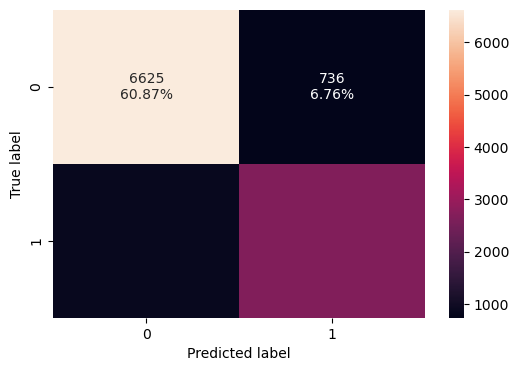

In [114]:
confusion_matrix_sklearn(knn_3, X_test, y_test)

In [115]:
knn_perf_test_3 = model_performance_classification_sklearn(
    knn_3, X_test, y_test
)
knn_perf_test_3

Accuracy  Recall  Precision      F1
0   0.85271 0.75383    0.78295 0.76812

Let's run the KNN with no of neighbours to be 1,3,5..19 and find the optimal number of neighbours from the above list using the recall score

#### K with different values

In [116]:
# creating odd list of K for KNN
# myList = list(range(2,20))

# subsetting just the odd ones
# neighbors = list(filter(lambda x: x % 2 != 0, myList))

# creating a list of odd values of K for KNN
neighbors = [i for i in range(3,20) if i%2 != 0]

# empty list that will hold recall scores
recall_scores_train = []
recall_scores_test = []

# perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # predict on train and test
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # evaluate recall on train and test
    scores_train = recall_score(y_train, y_pred_train)
    recall_scores_train.append(scores_train)
    scores_test = recall_score(y_test, y_pred_test)
    recall_scores_test.append(scores_test)

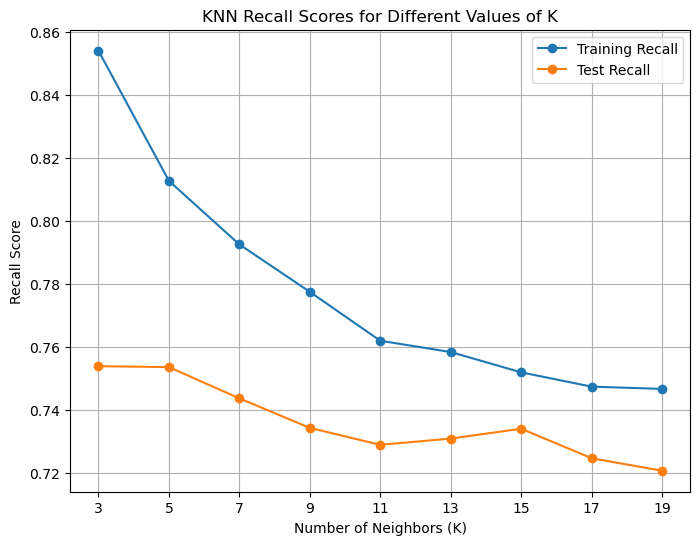

In [117]:
import matplotlib.pyplot as plt

# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

- The recall scores for both training and test sets are highest when k=3. This suggests that with k=3, the model is better at identifying positive instances in both the training and test data compared to other values of k.

- As the value of k increases beyond 3, the recall scores tend to decrease for both training and test sets. This indicates a potential risk of the model not being able to identify the underlying patterns in the data.

- Therefore, based on the provided recall scores, k=3 appears to be the most suitable choice for balancing model performance between capturing positive instances effectively and generalizing well to new data.

## Naive Bayes

In [118]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

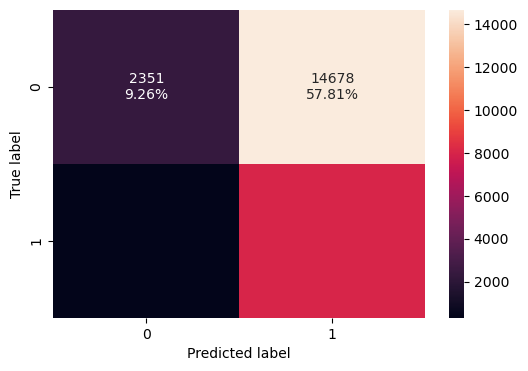

In [119]:
confusion_matrix_sklearn(nb, X_train, y_train)

In [120]:
nb_perf_train = model_performance_classification_sklearn(
    nb, X_train, y_train
)
nb_perf_train

Accuracy  Recall  Precision      F1
0   0.40970 0.96281    0.35425 0.51793

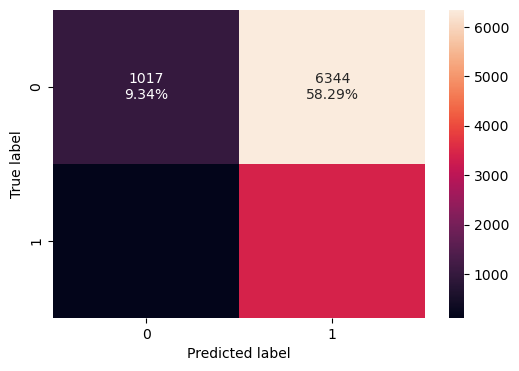

In [121]:
confusion_matrix_sklearn(nb, X_test, y_test)

In [122]:
nb_perf_test = model_performance_classification_sklearn(
    nb, X_test, y_test
)
nb_perf_test

Accuracy  Recall  Precision      F1
0   0.40614 0.96621    0.34913 0.51292

## Comparison of Models and Final Model Selection

In [123]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        knn_perf_train_3.T,
        nb_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "K Nearest Neighbor k=3",
    "Naive Bayes",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


K Nearest Neighbor k=3  Naive Bayes
Accuracy                  0.91588      0.40970
Recall                    0.85412      0.96281
Precision                 0.88634      0.35425
F1                        0.86993      0.51793

In [124]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        knn_perf_test_3.T,
        nb_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "K Nearest Neighbor k=3",
    "Naive Bayes",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


K Nearest Neighbor k=3  Naive Bayes
Accuracy                  0.85271      0.40614
Recall                    0.75383      0.96621
Precision                 0.78295      0.34913
F1                        0.76812      0.51292

- In both the training and test sets, the K Nearest Neighbor model with k=3 demonstrates the highest recall among all compared models. This indicates that the model with k=3 is better at correctly identifying positive instances compared to the models with different k values and Naive Bayes.

- Naive Bayes consistently shows lower recall values compared to K Nearest Neighbor models with different k values. This suggests that Naive Bayes may struggle to capture positive instances as effectively as K Nearest Neighbor models in both training and test datasets, highlighting potential limitations in its performance for this specific task.

## Decision Tree (default)

### Data Preparation for Modeling

In [125]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

#Converting values to float
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [126]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


* We had seen that around 67.06% of observations belongs to class 0 (Not Cancelled and 3.29% observations belongs to class 1 (Cancelled), and this is preserved in the train and test sets

## Model Building

### Decision Tree (default)

In [127]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
Predicting a booking cancellation will not cancelled but in reality, the booking will cancel (FN)
Predicting a booking cancellation will cancel but in reality, the booking will not cancel (FP)
Which case is more important?

If we predict that a booking cancellation will not cancelled but in reality, the booking will cancel then the hotel will have to bear the cost of cancellation like revenue loss
If we predict that a booking cancellation will cancel but in reality, the booking will not cancel then the hotel will have to arrange rooms in other hotel for rental or they should give discount
This cost is generally less compared to the cost of cancellation.
How to reduce the losses?

The Hotel would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.



In [128]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [129]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

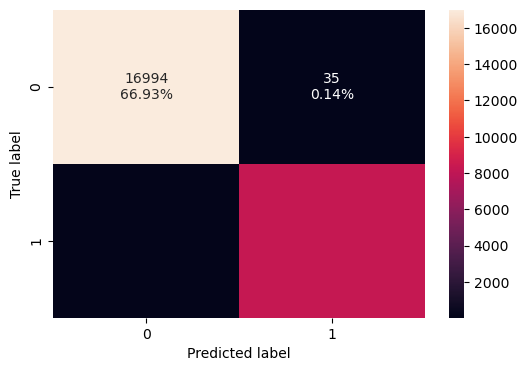

In [130]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [131]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

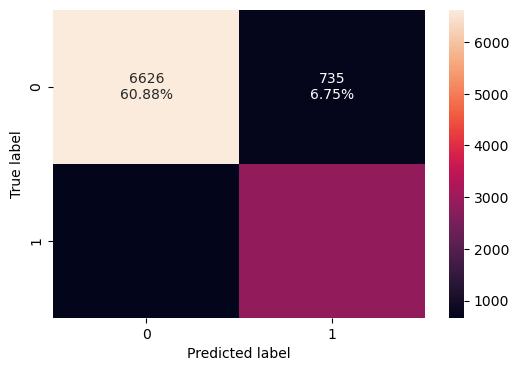

In [132]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [133]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision      F1
0   0.87108 0.81034    0.79521 0.80270

### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [134]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

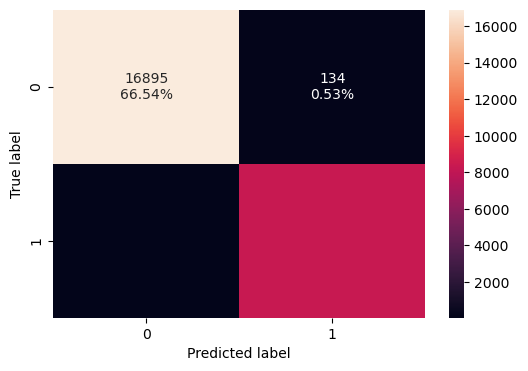

In [135]:
confusion_matrix_sklearn(model, X_train, y_train)

In [136]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99311 0.99510    0.98415 0.98960

* Model is able to perfectly classify all the data points on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

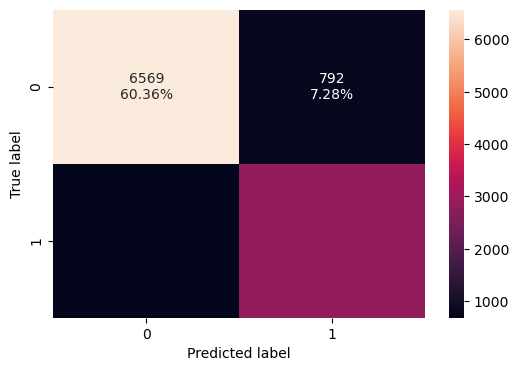

In [137]:
confusion_matrix_sklearn(model, X_test, y_test)

In [138]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86447 0.80608    0.78188 0.79379

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [139]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

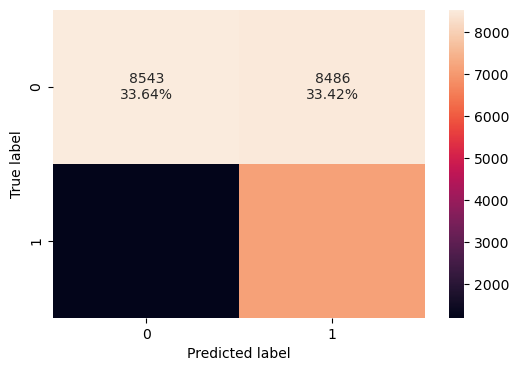

In [140]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [141]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.61854 0.85651    0.45773 0.59662

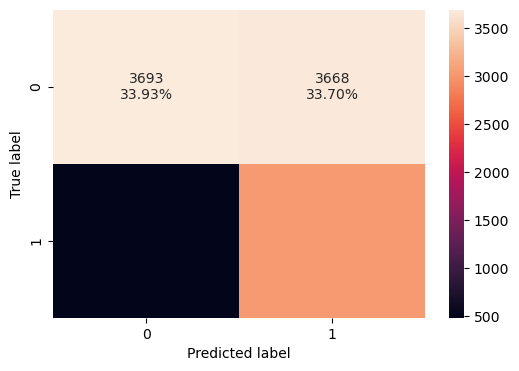

In [142]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [143]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.61840 0.86229    0.45295 0.59392

* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.96 which shows that the model is able to generalize well on unseen data.

In [144]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

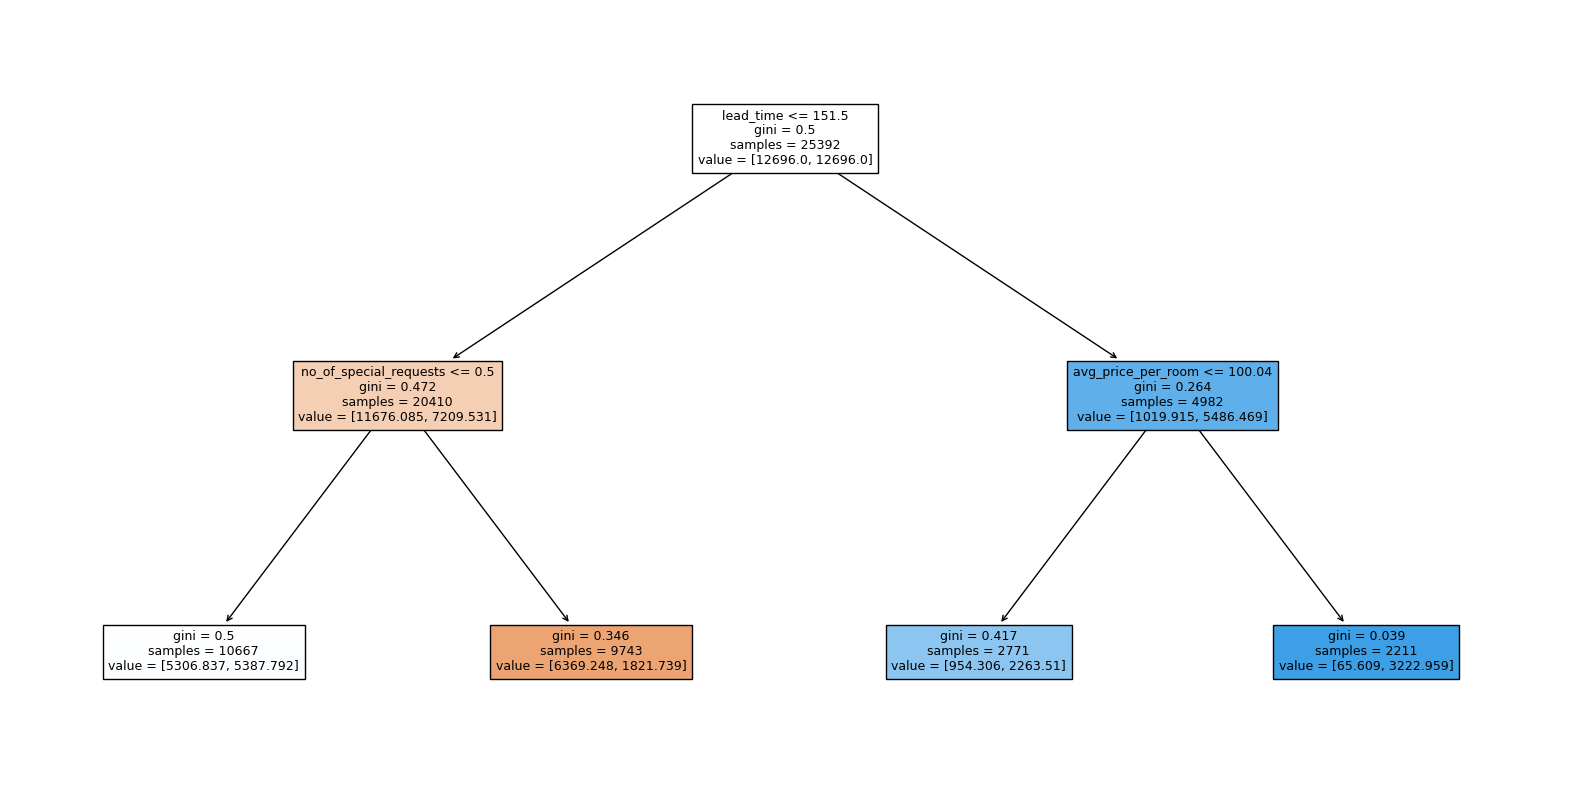

In [145]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [146]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1



**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

*Lead time ≤ 151.50 & special requests ≤ 0.50: Predict class 1, with fairly balanced weights between the two classes.
* Lead time ≤ 151.50 & special requests > 0.50: Predict class 0, strongly supported by the weights.
* Lead time > 151.50 & avg_price_per_room ≤ 100.04: Predict class 1, but weights favor class 0.
* Lead time > 151.50 & avg_price_per_room > 100.04: Predict class 1, despite class 0 having much higher weight.

* Lead Time is a critical factor, with shorter lead times tending to favor class 1, while higher lead times show more variability based on the room price.
* Number of Special Requests also plays a significant role for short lead times, and if there are any requests, it tends to favor class 0.
* Average Price Per Room impacts predictions for longer lead times, with lower prices generally leaning toward class 1.
    
`Interpretations from other decision rules can be made similarly`

In [147]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.67701797, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08174876, 0.24123327, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

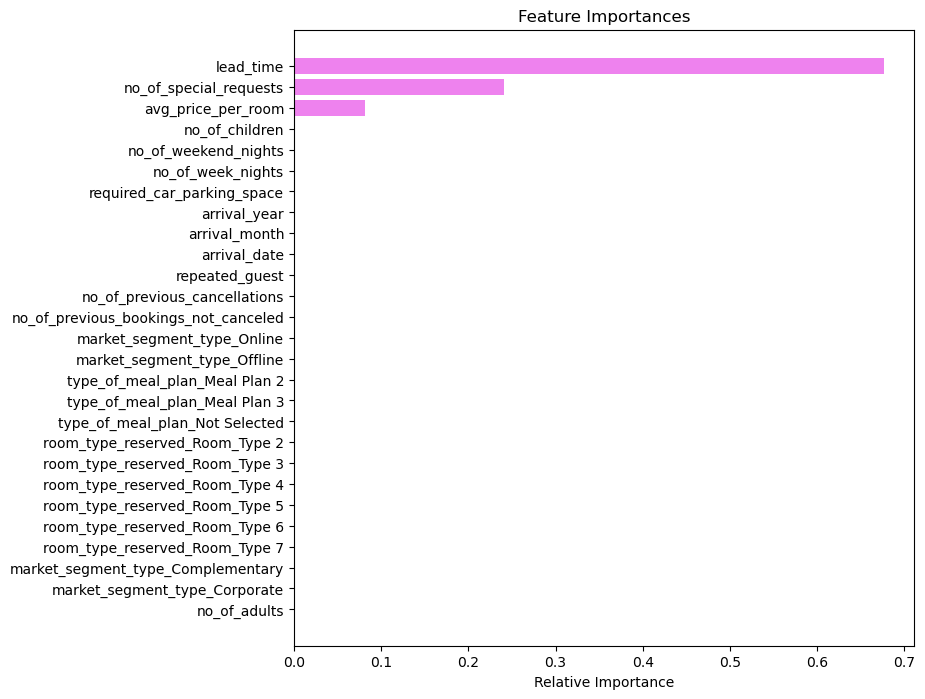

In [148]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

*  According to the graph, lead time is the most important feature.

### Decision Tree (Post pruning)

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [149]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [150]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1       -0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1837     0.00890     0.32806
1838     0.00980     0.33786
1839     0.01272     0.35058
1840     0.03412     0.41882
1841     0.08118     0.50000

[1842 rows x 2 columns]

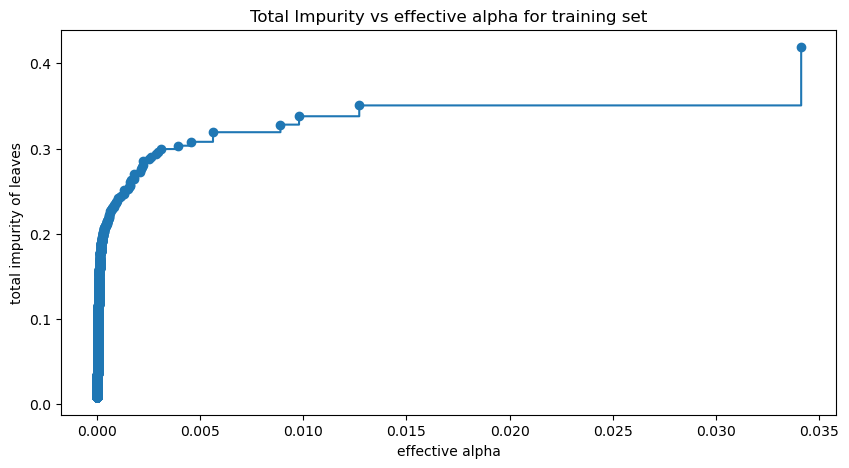

In [151]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [152]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

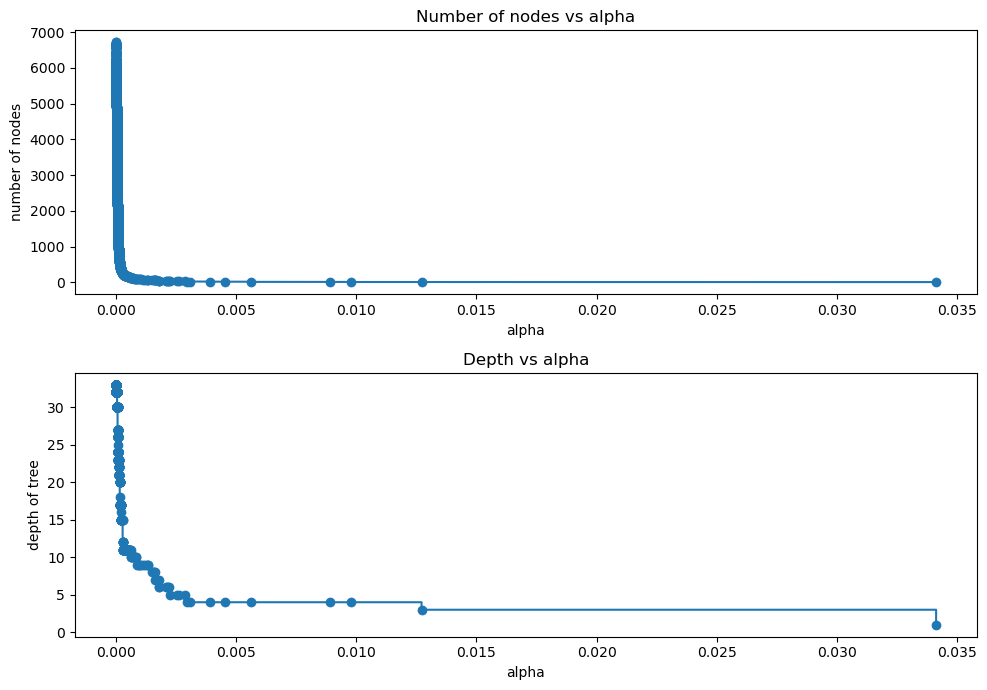

In [153]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [154]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [155]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [156]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

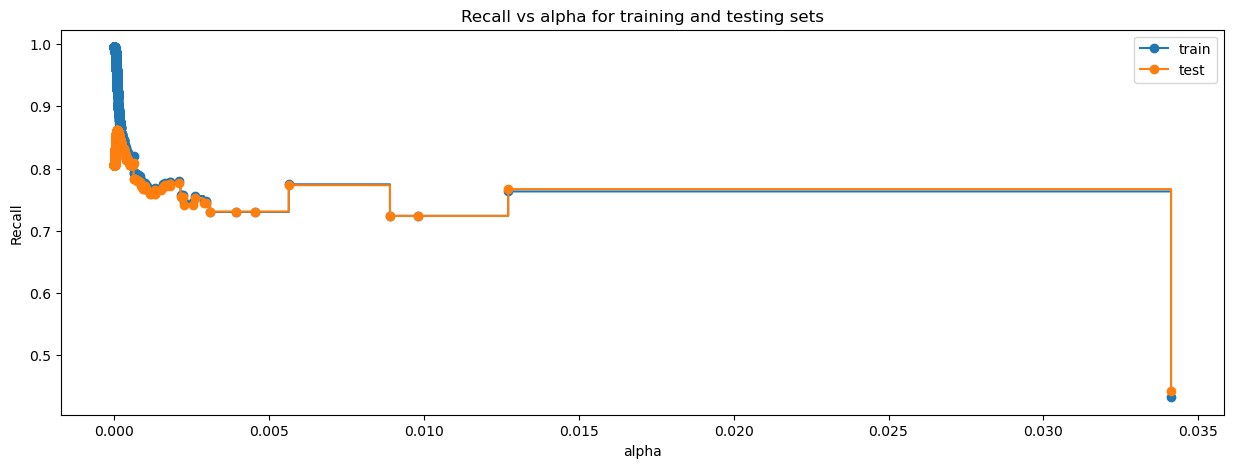

In [157]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [158]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=8.046650001478856e-05, class_weight='balanced',
                       random_state=1)


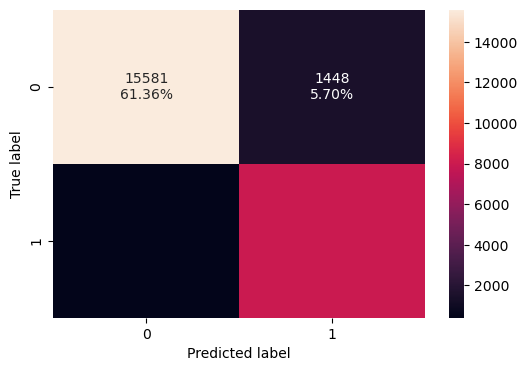

In [159]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [160]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.92698 0.95145    0.84604 0.89566

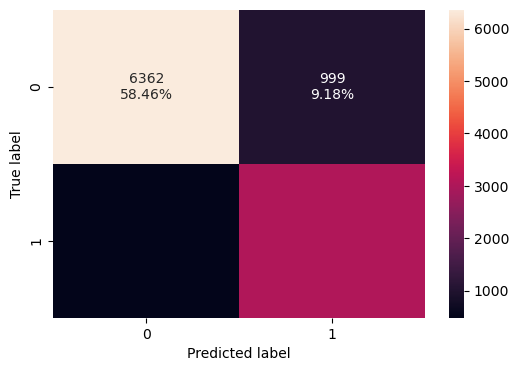

In [161]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [162]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86373 0.86258    0.75254 0.80381

* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.95 and 0.86 respectively which shows that the model is able to generalize well on unseen data.

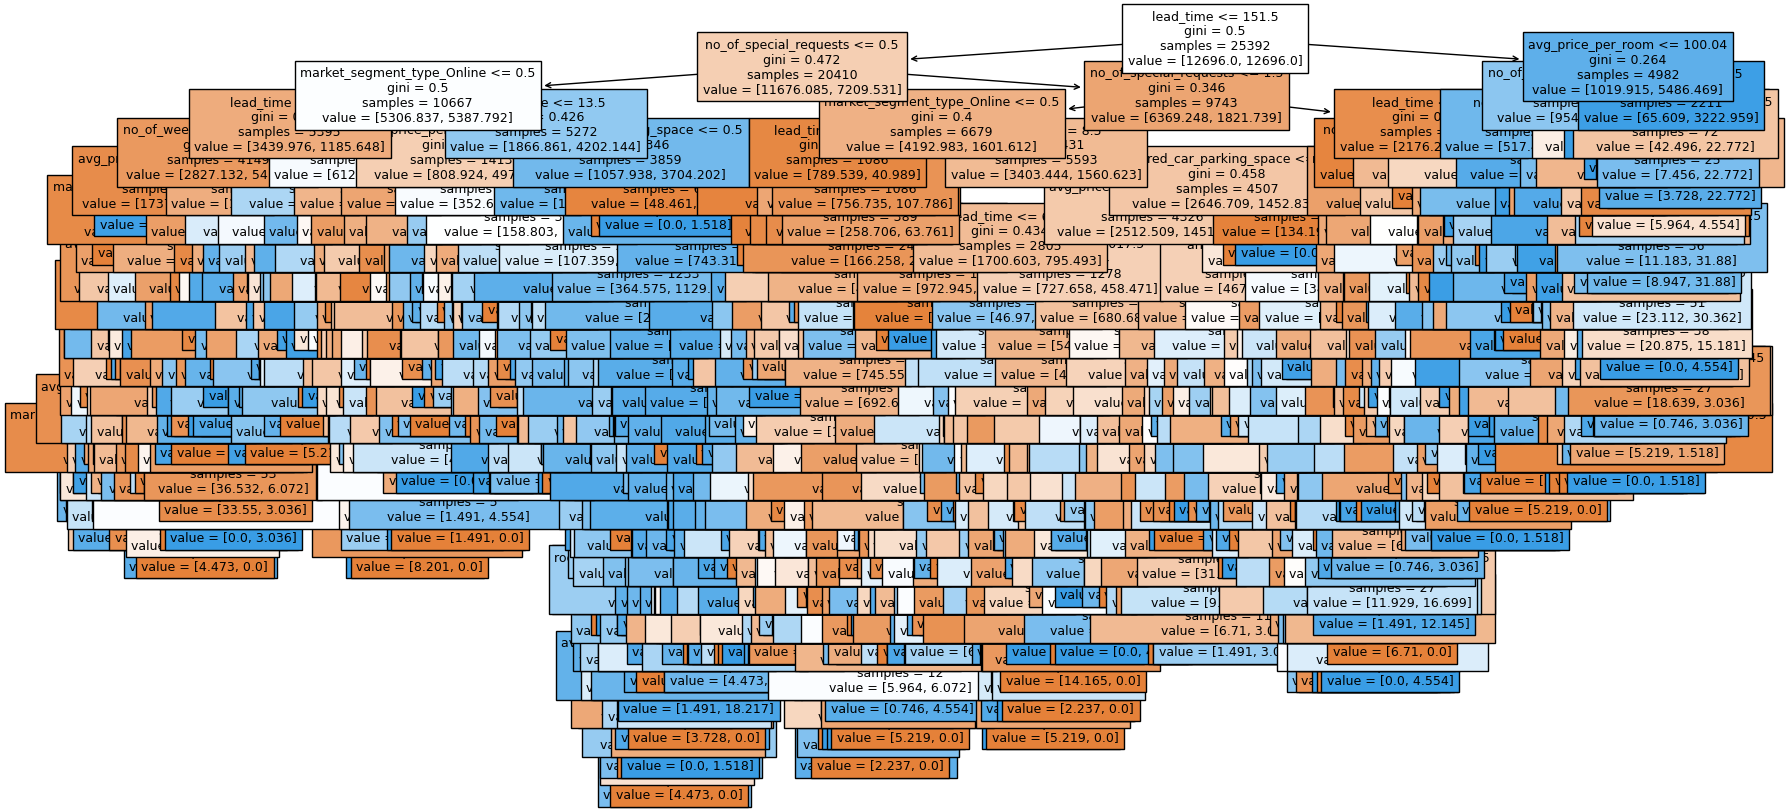

In [163]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [164]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

In [165]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

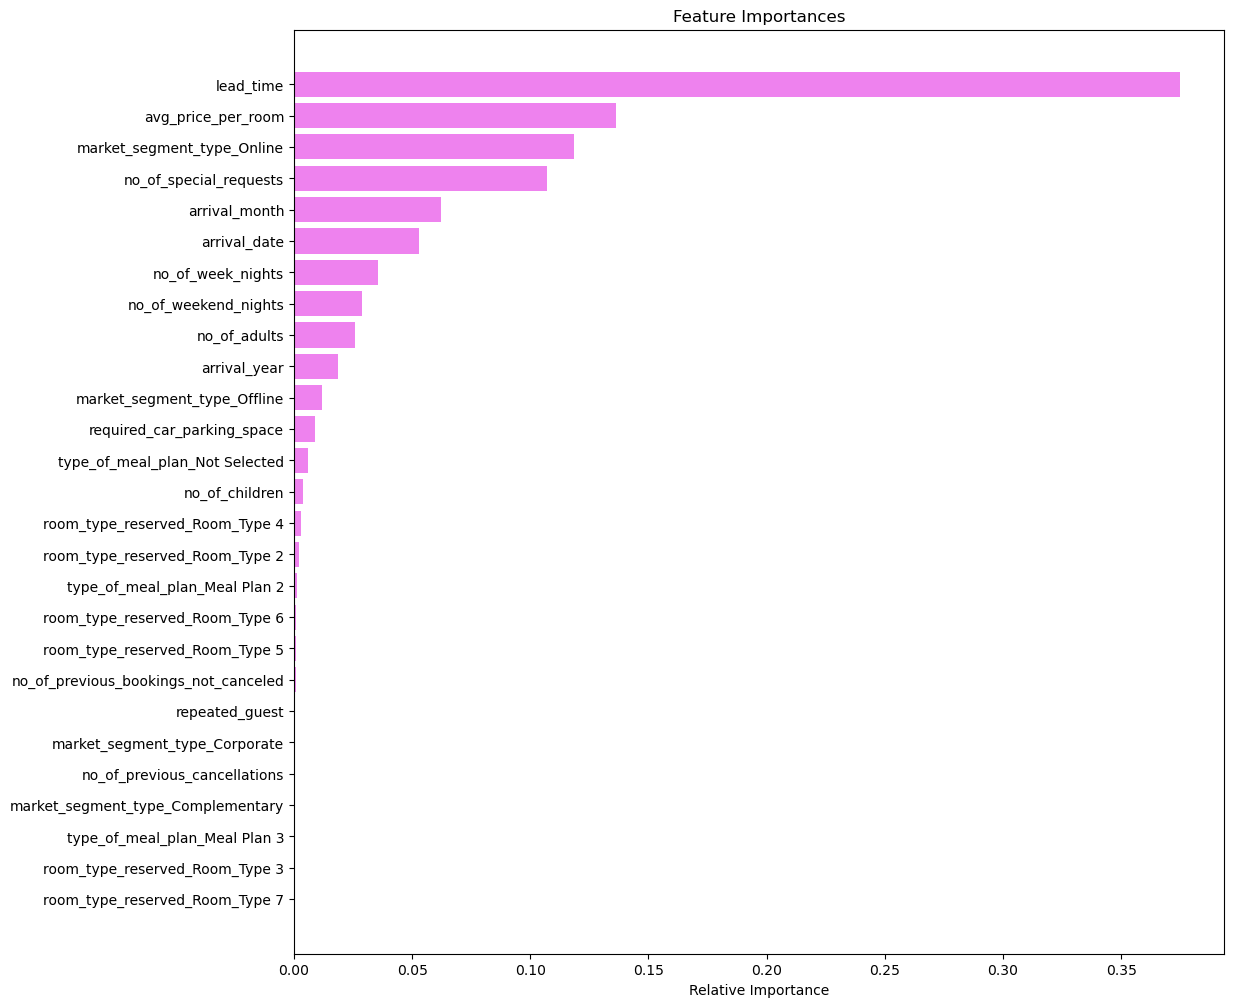

In [166]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Lead time is the most important features for the post pruned tree

## Comparison of Models and Final Model Selection

In [167]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.99421   
Recall                                0.98661   
Precision                             0.99578   
F1                                    0.99117   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.99311                      0.61854   
Recall                             0.99510                      0.85651   
Precision                          0.98415                      0.45773   
F1                                 0.98960                      0.59662   

           Decision Tree (Post-Pruning)  
Accuracy                        0.92698  
Recall                          0.95145  
Precision                       0.84604  
F1                              0.89566

In [168]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.87108   
Recall                                0.81034   
Precision                             0.79521   
F1                                    0.80270   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.86447                      0.61840   
Recall                             0.80608                      0.86229   
Precision                          0.78188                      0.45295   
F1                                 0.79379                      0.59392   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86373  
Recall                          0.86258  
Precision                       0.75254  
F1                              0.80381

### Model Performance Comparison and Final Model Selection

In [169]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        knn_perf_train_3.T,
        nb_perf_train.T,
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,

            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
    "K Nearest Neighbor k=3",
    "Naive Bayes",
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",

]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80541   
Recall                                         0.63255   
Precision                                      0.73903   
F1                                             0.68166   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79289   
Recall                                0.73562   
Precision                             0.66870   
F1                                    0.70056   

           Logistic Regression-0.42 Threshold  K Nearest Neighbor k=3  \
Accuracy                              0.80128                 0.91588   
Recall                                0.69939                 0.85412   
Precision                             0.69789                 0.88634   
F1                                    0.69864                 0.86993   

           Naive Bayes  Decision Tree without class_weight  \
Accuracy       0.40970                             0.99421   
Recall         0.96281                             0.98661   
Precision      0.35425                             0.99578   
F1             0.51793                             0.99117   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.99311                      0.61854   
Recall                             0.99510                      0.85651   
Precision                          0.98415                      0.45773   
F1                                 0.98960                      0.59662   

           Decision Tree (Post-Pruning)  
Accuracy                        0.92698  
Recall                          0.95145  
Precision                       0.84604  
F1                              0.89566

In [171]:
# testing performance comparison

models_test_comp_df = pd.concat(
   [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        knn_perf_test_3.T,
        nb_perf_test.T,
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,

            ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
    "K Nearest Neighbor k=3",
    "Naive Bayes",
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",

]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80465   
Recall                                         0.63089   
Precision                                      0.72900   
F1                                             0.67641   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79601   
Recall                                0.73935   
Precision                             0.66667   
F1                                    0.70113   

           Logistic Regression-0.42 Threshold  K Nearest Neighbor k=3  \
Accuracy                              0.80364                 0.85271   
Recall                                0.70386                 0.75383   
Precision                             0.69381                 0.78295   
F1                                    0.69880                 0.76812   

           Naive Bayes  Decision Tree without class_weight  \
Accuracy       0.40614                             0.87108   
Recall         0.96621                             0.81034   
Precision      0.34913                             0.79521   
F1             0.51292                             0.80270   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.86447                      0.61840   
Recall                             0.80608                      0.86229   
Precision                          0.78188                      0.45295   
F1                                 0.79379                      0.59392   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86373  
Recall                          0.86258  
Precision                       0.75254  
F1                              0.80381

## Conclusions and Recommendations

___